In [229]:
import sys
import pathlib
sys.path.insert(0, "../py-graph/")


import networkx as nx
import numpy as np
import time

from utils.utils import getSPGraph


def marginalizedkernel(*args):
    """Calculate marginalized graph kernels between graphs.
    
    Parameters
    ----------
    Gn : List of NetworkX graph
        List of graphs between which the kernels are calculated.
    /
    G1, G2 : NetworkX graphs
        2 graphs between which the kernel is calculated.
        
    Return
    ------
    Kmatrix/Kernel : Numpy matrix/int
        Kernel matrix, each element of which is the sp kernel between 2 praphs. / SP Kernel between 2 graphs.
        
    References
    ----------
    [1] H. Kashima, K. Tsuda, and A. Inokuchi. Marginalized kernels between labeled graphs. In Proceedings of the 20th International Conference on Machine Learning, Washington, DC, United States, 2003.
    """
    if len(args) == 3: # for a list of graphs
        Gn = args[0]

        Kmatrix = np.zeros((len(Gn), len(Gn)))

        start_time = time.time()
        for i in range(0, len(Gn)):
            for j in range(i, len(Gn)):
                print('\n --- under the realm of G%d G%d ---' % (i, j))
                Kmatrix[i][j] = marginalizedkernel(Gn[i], Gn[j], args[1], args[2])
                Kmatrix[j][i] = Kmatrix[i][j]
                print(Kmatrix[i][j])

            print("--- marginalized kernel matrix of size %d built in %s seconds ---" % (len(Gn), (time.time() - start_time)))
        
        return Kmatrix
        
    else: # for only 2 graphs
        
        # init parameters
        G1 = args[0]
        G2 = args[1]
        p_quit = args[2] # the termination probability in the random walks generating step
        itr = args[3] # time of iterations to calculate R_inf
        
        kernel = 0
        num_nodes_G1 = nx.number_of_nodes(G1)
        num_nodes_G2 = nx.number_of_nodes(G2)
        p_init_G1 = 1 / num_nodes_G1 # the initial probability distribution in the random walks generating step (uniform distribution over |G|)
        p_init_G2 = 1 / num_nodes_G2
        
        q = p_quit * p_quit
        r1 = q
        
        # initial R_inf
        R_inf = np.zeros([num_nodes_G1, num_nodes_G2]) # matrix to save all the R_inf for all pairs of nodes
#         print(R_inf)
        
        # calculate R_inf with a simple interative method
#         print('\n --- part I: calculating R_inf ---')
        for i in range(1, itr):
#             print('\n --- iterating the %dth time ---' % (i + 1))
            R_inf_new = np.zeros([num_nodes_G1, num_nodes_G2])
            R_inf_new.fill(r1)
#             print(R_inf_new)

            for node1 in G1.nodes(data = True):
                neighbor_n1 = G1[node1[0]]
                p_trans_n1 = (1 - p_quit) / len(neighbor_n1) # the transition probability distribution in the random walks generating step (uniform distribution over the vertices adjacent to the current vertex)
                for node2 in G2.nodes(data = True):
                    neighbor_n2 = G2[node2[0]]
                    p_trans_n2 = (1 - p_quit) / len(neighbor_n2)    
#                     print('\n --- under the realm of node %d in G1 and node %d in G2 ---' % (node1[0], node2[0]))

                    for neighbor1 in neighbor_n1:
                        for neighbor2 in neighbor_n2:
#                             print('\n --- for neighbors %d in G1 and %d in G2 ---' % (neighbor1, neighbor2))
                            
                            t = p_trans_n1 * p_trans_n2 * \
                                deltaKernel(G1.node[neighbor1]['label'] == G2.node[neighbor2]['label']) * \
                                deltaKernel(neighbor_n1[neighbor1]['label'] == neighbor_n2[neighbor2]['label'])
                            R_inf_new[node1[0]][node2[0]] += t * R_inf[neighbor1][neighbor2]
#                             print(R_inf_new)

            R_inf[:] = R_inf_new
#             print(R_inf)
        
        # calculate kernel
#         print('\n --- part II: calculating kernel ---')
        for node1 in G1.nodes(data = True):
            for node2 in G2.nodes(data = True):
#                 print('\n --- under the realm of node %d in G1 and node %d in G2 ---' % (node1[0], node2[0]))
                
                s = p_init_G1 * p_init_G2 * deltaKernel(node1[1]['label'] == node2[1]['label'])
#                 print(s)
                kernel += s * R_inf[node1[0]][node2[0]]
#                 print(kernel)

#         print('\n --- marginalized kernel built in %s seconds ---' % (time.time() - start_time))
        
        return kernel
    
def deltaKernel(condition):
    """Return 1 if condition holds, 0 otherwise.
    
    Parameters
    ----------
    condition : Boolean
        List of graphs between which the kernels are calculated.
        
    Return
    ------
    Kmatrix/Kernel : Numpy matrix/int
        Kernel matrix, each element of which is the sp kernel between 2 praphs. / SP Kernel between 2 graphs.
        
    References
    ----------
    [1] H. Kashima, K. Tsuda, and A. Inokuchi. Marginalized kernels between labeled graphs. In Proceedings of the 20th International Conference on Machine Learning, Washington, DC, United States, 2003.
    """
    return (1 if condition else 0)

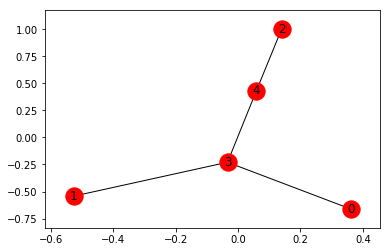


 --- under the realm of G0 G0 ---
0.185185185185

 --- under the realm of G0 G1 ---
0.155913978495

 --- under the realm of G0 G2 ---
0.111111111111

 --- under the realm of G0 G3 ---
0.0833333333333

 --- under the realm of G0 G4 ---
0.17281420765

 --- under the realm of G0 G5 ---
0.152841781874

 --- under the realm of G0 G6 ---
0.177777777777

 --- under the realm of G0 G7 ---
0.125

 --- under the realm of G0 G8 ---
0.1

 --- under the realm of G0 G9 ---
0.1

 --- under the realm of G0 G10 ---
0.171584699454

 --- under the realm of G0 G11 ---
0.165591397849

 --- under the realm of G0 G12 ---
0.169565217391

 --- under the realm of G0 G13 ---
0.150793650794

 --- under the realm of G0 G14 ---
0.15372571213

 --- under the realm of G0 G15 ---
0.165886026542

 --- under the realm of G0 G16 ---
0.172161172161

 --- under the realm of G0 G17 ---
0.174863387978

 --- under the realm of G0 G18 ---
0.133333333333

 --- under the realm of G0 G19 ---
0.133333333333

 --- under the realm 

0.164848484848

 --- under the realm of G0 G171 ---
0.164410058027

 --- under the realm of G0 G172 ---
0.164410058027

 --- under the realm of G0 G173 ---
0.16134751773

 --- under the realm of G0 G174 ---
0.166177908113

 --- under the realm of G0 G175 ---
0.166177908113

 --- under the realm of G0 G176 ---
0.165289256198

 --- under the realm of G0 G177 ---
0.166177908113

 --- under the realm of G0 G178 ---
0.166177908113

 --- under the realm of G0 G179 ---
0.167984189723

 --- under the realm of G0 G180 ---
0.151515151515

 --- under the realm of G0 G181 ---
0.151515151515

 --- under the realm of G0 G182 ---
0.151515151515

 --- under the realm of G0 G183 ---
0.151515151515

 --- under the realm of G0 G184 ---
0.151515151515
--- marginalized kernel matrix of size 185 built in 2.25942063331604 seconds ---

 --- under the realm of G1 G1 ---
0.152542372881

 --- under the realm of G1 G2 ---
0.0833333333333

 --- under the realm of G1 G3 ---
0.0625

 --- under the realm of G1 G4 ---

0.1323

 --- under the realm of G1 G154 ---
0.1323

 --- under the realm of G1 G155 ---
0.131324701195

 --- under the realm of G1 G156 ---
0.1323

 --- under the realm of G1 G157 ---
0.129397233202

 --- under the realm of G1 G158 ---
0.129754659566

 --- under the realm of G1 G159 ---
0.137275157997

 --- under the realm of G1 G160 ---
0.133741258741

 --- under the realm of G1 G161 ---
0.133741258741

 --- under the realm of G1 G162 ---
0.132575757576

 --- under the realm of G1 G163 ---
0.13474025974

 --- under the realm of G1 G164 ---
0.133575197889

 --- under the realm of G1 G165 ---
0.1125

 --- under the realm of G1 G166 ---
0.1125

 --- under the realm of G1 G167 ---
0.102272727273

 --- under the realm of G1 G168 ---
0.102272727273

 --- under the realm of G1 G169 ---
0.12987012987

 --- under the realm of G1 G170 ---
0.128997484729

 --- under the realm of G1 G171 ---
0.128708133971

 --- under the realm of G1 G172 ---
0.128708133971

 --- under the realm of G1 G173 ---
0.

 --- under the realm of G2 G143 ---
0.154593175853

 --- under the realm of G2 G144 ---
0.162007168459

 --- under the realm of G2 G145 ---
0.15

 --- under the realm of G2 G146 ---
0.15

 --- under the realm of G2 G147 ---
0.15

 --- under the realm of G2 G148 ---
0.15

 --- under the realm of G2 G149 ---
0.15

 --- under the realm of G2 G150 ---
0.15

 --- under the realm of G2 G151 ---
0.15

 --- under the realm of G2 G152 ---
0.15

 --- under the realm of G2 G153 ---
0.15

 --- under the realm of G2 G154 ---
0.15

 --- under the realm of G2 G155 ---
0.15

 --- under the realm of G2 G156 ---
0.15

 --- under the realm of G2 G157 ---
0.15

 --- under the realm of G2 G158 ---
0.136363636364

 --- under the realm of G2 G159 ---
0.136363636364

 --- under the realm of G2 G160 ---
0.136363636364

 --- under the realm of G2 G161 ---
0.136363636364

 --- under the realm of G2 G162 ---
0.136363636364

 --- under the realm of G2 G163 ---
0.136363636364

 --- under the realm of G2 G164 ---
0.

0.1

 --- under the realm of G3 G129 ---
0.1

 --- under the realm of G3 G130 ---
0.1

 --- under the realm of G3 G131 ---
0.1

 --- under the realm of G3 G132 ---
0.1

 --- under the realm of G3 G133 ---
0.130952380952

 --- under the realm of G3 G134 ---
0.130952380952

 --- under the realm of G3 G135 ---
0.130952380952

 --- under the realm of G3 G136 ---
0.128827646544

 --- under the realm of G3 G137 ---
0.129532163743

 --- under the realm of G3 G138 ---
0.13024039871

 --- under the realm of G3 G139 ---
0.13024039871

 --- under the realm of G3 G140 ---
0.133111111111

 --- under the realm of G3 G141 ---
0.132142857143

 --- under the realm of G3 G142 ---
0.132142857143

 --- under the realm of G3 G143 ---
0.130230125523

 --- under the realm of G3 G144 ---
0.133333333333

 --- under the realm of G3 G145 ---
0.1125

 --- under the realm of G3 G146 ---
0.1125

 --- under the realm of G3 G147 ---
0.1125

 --- under the realm of G3 G148 ---
0.1125

 --- under the realm of G3 G149 -

0.184721507876

 --- under the realm of G4 G112 ---
0.18520468453

 --- under the realm of G4 G113 ---
0.160604056437

 --- under the realm of G4 G114 ---
0.200778543666

 --- under the realm of G4 G115 ---
0.200773536108

 --- under the realm of G4 G116 ---
0.200789622589

 --- under the realm of G4 G117 ---
0.200640240904

 --- under the realm of G4 G118 ---
0.200551195708

 --- under the realm of G4 G119 ---
0.200651368826

 --- under the realm of G4 G120 ---
0.200945311144

 --- under the realm of G4 G121 ---
0.200800701512

 --- under the realm of G4 G122 ---
0.200562347974

 --- under the realm of G4 G123 ---
0.200329932044

 --- under the realm of G4 G124 ---
0.200407584658

 --- under the realm of G4 G125 ---
0.201086240878

 --- under the realm of G4 G126 ---
0.200668050766

 --- under the realm of G4 G127 ---
0.186327839427

 --- under the realm of G4 G128 ---
0.188478368192

 --- under the realm of G4 G129 ---
0.188778053867

 --- under the realm of G4 G130 ---
0.18941726939

0.164876536753

 --- under the realm of G5 G94 ---
0.164900334858

 --- under the realm of G5 G95 ---
0.159346971358

 --- under the realm of G5 G96 ---
0.158946031746

 --- under the realm of G5 G97 ---
0.159092644932

 --- under the realm of G5 G98 ---
0.159105809717

 --- under the realm of G5 G99 ---
0.158984126984

 --- under the realm of G5 G100 ---
0.159245782387

 --- under the realm of G5 G101 ---
0.159114470464

 --- under the realm of G5 G102 ---
0.159185792026

 --- under the realm of G5 G103 ---
0.159220716373

 --- under the realm of G5 G104 ---
0.146629015379

 --- under the realm of G5 G105 ---
0.14788289656

 --- under the realm of G5 G106 ---
0.147909358289

 --- under the realm of G5 G107 ---
0.148190209353

 --- under the realm of G5 G108 ---
0.147806913936

 --- under the realm of G5 G109 ---
0.14835

 --- under the realm of G5 G110 ---
0.14850560329

 --- under the realm of G5 G111 ---
0.147777206301

 --- under the realm of G5 G112 ---
0.148163747624

 --- under 

 --- under the realm of G6 G80 ---
0.1125

 --- under the realm of G6 G81 ---
0.1125

 --- under the realm of G6 G82 ---
0.156864754098

 --- under the realm of G6 G83 ---
0.153427419355

 --- under the realm of G6 G84 ---
0.153427419355

 --- under the realm of G6 G85 ---
0.152306149733

 --- under the realm of G6 G86 ---
0.153427419355

 --- under the realm of G6 G87 ---
0.153427419355

 --- under the realm of G6 G88 ---
0.15175

 --- under the realm of G6 G89 ---
0.153427419355

 --- under the realm of G6 G90 ---
0.150646551724

 --- under the realm of G6 G91 ---
0.152306149733

 --- under the realm of G6 G92 ---
0.15175

 --- under the realm of G6 G93 ---
0.152306149733

 --- under the realm of G6 G94 ---
0.152306149733

 --- under the realm of G6 G95 ---
0.156739526412

 --- under the realm of G6 G96 ---
0.153405017921

 --- under the realm of G6 G97 ---
0.154504504505

 --- under the realm of G6 G98 ---
0.154504504505

 --- under the realm of G6 G99 ---
0.156093189964

 --- under

0.179022142227

 --- under the realm of G7 G77 ---
0.179116562249

 --- under the realm of G7 G78 ---
0.179141478399

 --- under the realm of G7 G79 ---
0.179048874284

 --- under the realm of G7 G80 ---
0.181917091644

 --- under the realm of G7 G81 ---
0.181962117029

 --- under the realm of G7 G82 ---
0.183286269224

 --- under the realm of G7 G83 ---
0.184718258441

 --- under the realm of G7 G84 ---
0.184853620701

 --- under the realm of G7 G85 ---
0.18520468453

 --- under the realm of G7 G86 ---
0.184886697861

 --- under the realm of G7 G87 ---
0.184721507876

 --- under the realm of G7 G88 ---
0.1854375

 --- under the realm of G7 G89 ---
0.184773319468

 --- under the realm of G7 G90 ---
0.18578856383

 --- under the realm of G7 G91 ---
0.185153129854

 --- under the realm of G7 G92 ---
0.185367207797

 --- under the realm of G7 G93 ---
0.185174621236

 --- under the realm of G7 G94 ---
0.185232710508

 --- under the realm of G7 G95 ---
0.161166666667

 --- under the realm o

 --- under the realm of G8 G64 ---
0.164008157823

 --- under the realm of G8 G65 ---
0.163838736728

 --- under the realm of G8 G66 ---
0.163895127188

 --- under the realm of G8 G67 ---
0.163784701734

 --- under the realm of G8 G68 ---
0.163852281564

 --- under the realm of G8 G69 ---
0.16401041011

 --- under the realm of G8 G70 ---
0.164026591461

 --- under the realm of G8 G71 ---
0.163761839121

 --- under the realm of G8 G72 ---
0.16369918493

 --- under the realm of G8 G73 ---
0.163676177587

 --- under the realm of G8 G74 ---
0.163966322087

 --- under the realm of G8 G75 ---
0.157693942408

 --- under the realm of G8 G76 ---
0.157503106807

 --- under the realm of G8 G77 ---
0.157578484891

 --- under the realm of G8 G78 ---
0.157598516593

 --- under the realm of G8 G79 ---
0.157524243075

 --- under the realm of G8 G80 ---
0.157350099064

 --- under the realm of G8 G81 ---
0.157292796177

 --- under the realm of G8 G82 ---
0.146629015379

 --- under the realm of G8 G83 --

0.128571428571

 --- under the realm of G9 G55 ---
0.128571428571

 --- under the realm of G9 G56 ---
0.1125

 --- under the realm of G9 G57 ---
0.1125

 --- under the realm of G9 G58 ---
0.1125

 --- under the realm of G9 G59 ---
0.1125

 --- under the realm of G9 G60 ---
0.1125

 --- under the realm of G9 G61 ---
0.1125

 --- under the realm of G9 G62 ---
0.1125

 --- under the realm of G9 G63 ---
0.1125

 --- under the realm of G9 G64 ---
0.157845433255

 --- under the realm of G9 G65 ---
0.153917050691

 --- under the realm of G9 G66 ---
0.153917050691

 --- under the realm of G9 G67 ---
0.152635599694

 --- under the realm of G9 G68 ---
0.153917050691

 --- under the realm of G9 G69 ---
0.157845433255

 --- under the realm of G9 G70 ---
0.157845433255

 --- under the realm of G9 G71 ---
0.152635599694

 --- under the realm of G9 G72 ---
0.152

 --- under the realm of G9 G73 ---
0.151367781155

 --- under the realm of G9 G74 ---
0.15652173913

 --- under the realm of G9 G75 ---
0.1

0.211463640743

 --- under the realm of G10 G53 ---
0.211835857722

 --- under the realm of G10 G54 ---
0.21148133077

 --- under the realm of G10 G55 ---
0.211504867504

 --- under the realm of G10 G56 ---
0.191161875823

 --- under the realm of G10 G57 ---
0.190862835657

 --- under the realm of G10 G58 ---
0.190741568716

 --- under the realm of G10 G59 ---
0.190793566237

 --- under the realm of G10 G60 ---
0.191045947564

 --- under the realm of G10 G61 ---
0.189859636905

 --- under the realm of G10 G62 ---
0.190593379908

 --- under the realm of G10 G63 ---
0.189911307794

 --- under the realm of G10 G64 ---
0.196848123613

 --- under the realm of G10 G65 ---
0.198992638794

 --- under the realm of G10 G66 ---
0.199248120301

 --- under the realm of G10 G67 ---
0.199700865066

 --- under the realm of G10 G68 ---
0.199058768873

 --- under the realm of G10 G69 ---
0.196855086037

 --- under the realm of G10 G70 ---
0.196930742356

 --- under the realm of G10 G71 ---
0.19960191427

 --- under the realm of G11 G44 ---
0.212967599728

 --- under the realm of G11 G45 ---
0.214744171576

 --- under the realm of G11 G46 ---
0.214842396313

 --- under the realm of G11 G47 ---
0.215333738602

 --- under the realm of G11 G48 ---
0.214766962503

 --- under the realm of G11 G49 ---
0.21297191944

 --- under the realm of G11 G50 ---
0.21299968754

 --- under the realm of G11 G51 ---
0.215293266643

 --- under the realm of G11 G52 ---
0.21352619612

 --- under the realm of G11 G53 ---
0.21582508089

 --- under the realm of G11 G54 ---
0.213801452785

 --- under the realm of G11 G55 ---
0.213540556414

 --- under the realm of G11 G56 ---
0.193102110114

 --- under the realm of G11 G57 ---
0.190158994375

 --- under the realm of G11 G58 ---
0.191993087558

 --- under the realm of G11 G59 ---
0.190134699106

 --- under the realm of G11 G60 ---
0.191646349745

 --- under the realm of G11 G61 ---
0.188822663823

 --- under the realm of G11 G62 ---
0.191947447911

 --- under the r

0.184390968074

 --- under the realm of G12 G32 ---
0.183039572789

 --- under the realm of G12 G33 ---
0.181963381884

 --- under the realm of G12 G34 ---
0.182905790133

 --- under the realm of G12 G35 ---
0.182286967209

 --- under the realm of G12 G36 ---
0.193622087133

 --- under the realm of G12 G37 ---
0.190340351672

 --- under the realm of G12 G38 ---
0.190407673861

 --- under the realm of G12 G39 ---
0.192997407153

 --- under the realm of G12 G40 ---
0.191397849462

 --- under the realm of G12 G41 ---
0.165426348988

 --- under the realm of G12 G42 ---
0.165961788971

 --- under the realm of G12 G43 ---
0.159270516717

 --- under the realm of G12 G44 ---
0.211631295003

 --- under the realm of G12 G45 ---
0.212528824646

 --- under the realm of G12 G46 ---
0.21266609398

 --- under the realm of G12 G47 ---
0.212827110015

 --- under the realm of G12 G48 ---
0.212558349384

 --- under the realm of G12 G49 ---
0.21163816613

 --- under the realm of G12 G50 ---
0.211675668385

0.116797900262

 --- under the realm of G13 G25 ---
0.179520230392

 --- under the realm of G13 G26 ---
0.181334548724

 --- under the realm of G13 G27 ---
0.18183183476

 --- under the realm of G13 G28 ---
0.179546584876

 --- under the realm of G13 G29 ---
0.180082934067

 --- under the realm of G13 G30 ---
0.180315786152

 --- under the realm of G13 G31 ---
0.165251531658

 --- under the realm of G13 G32 ---
0.163443291735

 --- under the realm of G13 G33 ---
0.161823921437

 --- under the realm of G13 G34 ---
0.163408105203

 --- under the realm of G13 G35 ---
0.162355575746

 --- under the realm of G13 G36 ---
0.163664677849

 --- under the realm of G13 G37 ---
0.160517547912

 --- under the realm of G13 G38 ---
0.160576351753

 --- under the realm of G13 G39 ---
0.163040564374

 --- under the realm of G13 G40 ---
0.161555555556

 --- under the realm of G13 G41 ---
0.139749055178

 --- under the realm of G13 G42 ---
0.140284009585

 --- under the realm of G13 G43 ---
0.13416477702

0.181954794629

 --- under the realm of G13 G182 ---
0.181961096564

 --- under the realm of G13 G183 ---
0.181986165666

 --- under the realm of G13 G184 ---
0.180420321176
--- marginalized kernel matrix of size 185 built in 49.51042652130127 seconds ---

 --- under the realm of G14 G14 ---
0.161153065455

 --- under the realm of G14 G15 ---
0.164879656352

 --- under the realm of G14 G16 ---
0.15715970884

 --- under the realm of G14 G17 ---
0.156211931996

 --- under the realm of G14 G18 ---
0.150089605735

 --- under the realm of G14 G19 ---
0.152482269504

 --- under the realm of G14 G20 ---
0.150714285714

 --- under the realm of G14 G21 ---
0.12706855792

 --- under the realm of G14 G22 ---
0.117957746479

 --- under the realm of G14 G23 ---
0.119089834515

 --- under the realm of G14 G24 ---
0.116228070175

 --- under the realm of G14 G25 ---
0.178621579182

 --- under the realm of G14 G26 ---
0.179633766193

 --- under the realm of G14 G27 ---
0.179834890813

 --- under the re


 --- under the realm of G14 G172 ---
0.189834036694

 --- under the realm of G14 G173 ---
0.18673117157

 --- under the realm of G14 G174 ---
0.189513797165

 --- under the realm of G14 G175 ---
0.18950650489

 --- under the realm of G14 G176 ---
0.189601607967

 --- under the realm of G14 G177 ---
0.189491952975

 --- under the realm of G14 G178 ---
0.189510151027

 --- under the realm of G14 G179 ---
0.188995258519

 --- under the realm of G14 G180 ---
0.180387167074

 --- under the realm of G14 G181 ---
0.179297840549

 --- under the realm of G14 G182 ---
0.179305169232

 --- under the realm of G14 G183 ---
0.179327474249

 --- under the realm of G14 G184 ---
0.177923144039
--- marginalized kernel matrix of size 185 built in 54.23309302330017 seconds ---

 --- under the realm of G15 G15 ---
0.174139229691

 --- under the realm of G15 G16 ---
0.167311111488

 --- under the realm of G15 G17 ---
0.166746365723

 --- under the realm of G15 G18 ---
0.158628571429

 --- under the realm o


 --- under the realm of G15 G163 ---
0.187263031899

 --- under the realm of G15 G164 ---
0.187305421945

 --- under the realm of G15 G165 ---
0.186051265077

 --- under the realm of G15 G166 ---
0.18474192488

 --- under the realm of G15 G167 ---
0.166328096749

 --- under the realm of G15 G168 ---
0.16724427953

 --- under the realm of G15 G169 ---
0.198993950535

 --- under the realm of G15 G170 ---
0.199075621985

 --- under the realm of G15 G171 ---
0.199215413896

 --- under the realm of G15 G172 ---
0.199158544762

 --- under the realm of G15 G173 ---
0.19535919858

 --- under the realm of G15 G174 ---
0.199057002591

 --- under the realm of G15 G175 ---
0.19905307558

 --- under the realm of G15 G176 ---
0.199066853042

 --- under the realm of G15 G177 ---
0.19904565875

 --- under the realm of G15 G178 ---
0.199055039085

 --- under the realm of G15 G179 ---
0.198850111777

 --- under the realm of G15 G180 ---
0.189507557962

 --- under the realm of G15 G181 ---
0.18842878500

0.178271344435

 --- under the realm of G16 G155 ---
0.17769004061

 --- under the realm of G16 G156 ---
0.178273683056

 --- under the realm of G16 G157 ---
0.176545563156

 --- under the realm of G16 G158 ---
0.167344808221

 --- under the realm of G16 G159 ---
0.17419719619

 --- under the realm of G16 G160 ---
0.172083853732

 --- under the realm of G16 G161 ---
0.172069690262

 --- under the realm of G16 G162 ---
0.17139431791

 --- under the realm of G16 G163 ---
0.172584138559

 --- under the realm of G16 G164 ---
0.171908840927

 --- under the realm of G16 G165 ---
0.162592062467

 --- under the realm of G16 G166 ---
0.161907105503

 --- under the realm of G16 G167 ---
0.146407003158

 --- under the realm of G16 G168 ---
0.146927503945

 --- under the realm of G16 G169 ---
0.177609747817

 --- under the realm of G16 G170 ---
0.177098303536

 --- under the realm of G16 G171 ---
0.176914702398

 --- under the realm of G16 G172 ---
0.176924922158

 --- under the realm of G16 G173 

0.174306075939

 --- under the realm of G17 G148 ---
0.173547442119

 --- under the realm of G17 G149 ---
0.174306152816

 --- under the realm of G17 G150 ---
0.175343601078

 --- under the realm of G17 G151 ---
0.174304849133

 --- under the realm of G17 G152 ---
0.175343601291

 --- under the realm of G17 G153 ---
0.175863776262

 --- under the realm of G17 G154 ---
0.175862066124

 --- under the realm of G17 G155 ---
0.175084934755

 --- under the realm of G17 G156 ---
0.175863681328

 --- under the realm of G17 G157 ---
0.173549846479

 --- under the realm of G17 G158 ---
0.164426973856

 --- under the realm of G17 G159 ---
0.172856607604

 --- under the realm of G17 G160 ---
0.170034786297

 --- under the realm of G17 G161 ---
0.17002676761

 --- under the realm of G17 G162 ---
0.16910770512

 --- under the realm of G17 G163 ---
0.170816902185

 --- under the realm of G17 G164 ---
0.169897999835

 --- under the realm of G17 G165 ---
0.159401782333

 --- under the realm of G17 G166

 --- under the realm of G18 G140 ---
0.217806201222

 --- under the realm of G18 G141 ---
0.201192726567

 --- under the realm of G18 G142 ---
0.201281305551

 --- under the realm of G18 G143 ---
0.201276340586

 --- under the realm of G18 G144 ---
0.20117868449

 --- under the realm of G18 G145 ---
0.21060585078

 --- under the realm of G18 G146 ---
0.211346762631

 --- under the realm of G18 G147 ---
0.211573407382

 --- under the realm of G18 G148 ---
0.212130544032

 --- under the realm of G18 G149 ---
0.211568533685

 --- under the realm of G18 G150 ---
0.210283335493

 --- under the realm of G18 G151 ---
0.211619698438

 --- under the realm of G18 G152 ---
0.210283295928

 --- under the realm of G18 G153 ---
0.209843159192

 --- under the realm of G18 G154 ---
0.20991626646

 --- under the realm of G18 G155 ---
0.210507609644

 --- under the realm of G18 G156 ---
0.209849559398

 --- under the realm of G18 G157 ---
0.212013260044

 --- under the realm of G18 G158 ---
0.1934343589

0.221604092804

 --- under the realm of G19 G134 ---
0.221639545359

 --- under the realm of G19 G135 ---
0.221621819082

 --- under the realm of G19 G136 ---
0.222818637993

 --- under the realm of G19 G137 ---
0.222458240687

 --- under the realm of G19 G138 ---
0.222031166746

 --- under the realm of G19 G139 ---
0.222048893023

 --- under the realm of G19 G140 ---
0.220121854793

 --- under the realm of G19 G141 ---
0.204222747837

 --- under the realm of G19 G142 ---
0.204260672894

 --- under the realm of G19 G143 ---
0.205367710843

 --- under the realm of G19 G144 ---
0.204361088032

 --- under the realm of G19 G145 ---
0.214564317673

 --- under the realm of G19 G146 ---
0.215471771108

 --- under the realm of G19 G147 ---
0.215666958229

 --- under the realm of G19 G148 ---
0.216414323733

 --- under the realm of G19 G149 ---
0.215662798952

 --- under the realm of G19 G150 ---
0.214196245903

 --- under the realm of G19 G151 ---
0.215709296995

 --- under the realm of G19 G1


 --- under the realm of G20 G132 ---
0.183380950906

 --- under the realm of G20 G133 ---
0.219069847359

 --- under the realm of G20 G134 ---
0.219115771636

 --- under the realm of G20 G135 ---
0.219092809704

 --- under the realm of G20 G136 ---
0.219542250789

 --- under the realm of G20 G137 ---
0.219444631345

 --- under the realm of G20 G138 ---
0.219256620159

 --- under the realm of G20 G139 ---
0.219279618032

 --- under the realm of G20 G140 ---
0.218225532477

 --- under the realm of G20 G141 ---
0.201885725275

 --- under the realm of G20 G142 ---
0.201931555042

 --- under the realm of G20 G143 ---
0.202414785071

 --- under the realm of G20 G144 ---
0.202123227504

 --- under the realm of G20 G145 ---
0.211545791674

 --- under the realm of G20 G146 ---
0.21234235893

 --- under the realm of G20 G147 ---
0.212545622696

 --- under the realm of G20 G148 ---
0.213180121371

 --- under the realm of G20 G149 ---
0.212540785766

 --- under the realm of G20 G150 ---
0.2112121

0.178157575308

 --- under the realm of G21 G125 ---
0.175113485888

 --- under the realm of G21 G126 ---
0.177582095464

 --- under the realm of G21 G127 ---
0.160533333333

 --- under the realm of G21 G128 ---
0.157043673012

 --- under the realm of G21 G129 ---
0.156294736842

 --- under the realm of G21 G130 ---
0.153154224793

 --- under the realm of G21 G131 ---
0.152935059095

 --- under the realm of G21 G132 ---
0.154818829114

 --- under the realm of G21 G133 ---
0.189095136886

 --- under the realm of G21 G134 ---
0.18913025268

 --- under the realm of G21 G135 ---
0.189112694812

 --- under the realm of G21 G136 ---
0.190155287818

 --- under the realm of G21 G137 ---
0.189845004072

 --- under the realm of G21 G138 ---
0.189470095231

 --- under the realm of G21 G139 ---
0.18948764934

 --- under the realm of G21 G140 ---
0.187781274296

 --- under the realm of G21 G141 ---
0.179709391019

 --- under the realm of G21 G142 ---
0.179741013677

 --- under the realm of G21 G143

 --- under the realm of G22 G119 ---
0.160671285958

 --- under the realm of G22 G120 ---
0.159843447647

 --- under the realm of G22 G121 ---
0.160450202853

 --- under the realm of G22 G122 ---
0.160765959745

 --- under the realm of G22 G123 ---
0.161081716637

 --- under the realm of G22 G124 ---
0.160978114238

 --- under the realm of G22 G125 ---
0.159605215607

 --- under the realm of G22 G126 ---
0.160687886084

 --- under the realm of G22 G127 ---
0.144973544974

 --- under the realm of G22 G128 ---
0.143530647756

 --- under the realm of G22 G129 ---
0.14316300983

 --- under the realm of G22 G130 ---
0.141764669124

 --- under the realm of G22 G131 ---
0.141726998352

 --- under the realm of G22 G132 ---
0.142560062423

 --- under the realm of G22 G133 ---
0.176490454834

 --- under the realm of G22 G134 ---
0.176481529941

 --- under the realm of G22 G135 ---
0.176485992304

 --- under the realm of G22 G136 ---
0.175255762702

 --- under the realm of G22 G137 ---
0.17565562

0.162913256711

 --- under the realm of G23 G119 ---
0.162840081863

 --- under the realm of G23 G120 ---
0.161890461801

 --- under the realm of G23 G121 ---
0.162606456724

 --- under the realm of G23 G122 ---
0.162932857992

 --- under the realm of G23 G123 ---
0.163259259259

 --- under the realm of G23 G124 ---
0.163152861728

 --- under the realm of G23 G125 ---
0.161630817018

 --- under the realm of G23 G126 ---
0.162865121806

 --- under the realm of G23 G127 ---
0.146933333333

 --- under the realm of G23 G128 ---
0.145188503173

 --- under the realm of G23 G129 ---
0.144814035088

 --- under the realm of G23 G130 ---
0.143243779063

 --- under the realm of G23 G131 ---
0.143134196214

 --- under the realm of G23 G132 ---
0.144076081224

 --- under the realm of G23 G133 ---
0.178356544045

 --- under the realm of G23 G134 ---
0.178371315942

 --- under the realm of G23 G135 ---
0.178363929994

 --- under the realm of G23 G136 ---
0.177201110381

 --- under the realm of G23 G1

0.169103682238

 --- under the realm of G24 G114 ---
0.157312969106

 --- under the realm of G24 G115 ---
0.157311340479

 --- under the realm of G24 G116 ---
0.157323542112

 --- under the realm of G24 G117 ---
0.157490123301

 --- under the realm of G24 G118 ---
0.157561476501

 --- under the realm of G24 G119 ---
0.157500696307

 --- under the realm of G24 G120 ---
0.156878220319

 --- under the realm of G24 G121 ---
0.157334115118

 --- under the realm of G24 G122 ---
0.157572049507

 --- under the realm of G24 G123 ---
0.157809983897

 --- under the realm of G24 G124 ---
0.157732101958

 --- under the realm of G24 G125 ---
0.156698976578

 --- under the realm of G24 G126 ---
0.157513048731

 --- under the realm of G24 G127 ---
0.142028985507

 --- under the realm of G24 G128 ---
0.140957104804

 --- under the realm of G24 G129 ---
0.140679731529

 --- under the realm of G24 G130 ---
0.13962718695

 --- under the realm of G24 G131 ---
0.139604795875

 --- under the realm of G24 G13

 --- under the realm of G25 G117 ---
0.229755720073

 --- under the realm of G25 G118 ---
0.229742103594

 --- under the realm of G25 G119 ---
0.229811366842

 --- under the realm of G25 G120 ---
0.228701872427

 --- under the realm of G25 G121 ---
0.229692571208

 --- under the realm of G25 G122 ---
0.229797754268

 --- under the realm of G25 G123 ---
0.229907317924

 --- under the realm of G25 G124 ---
0.229877089175

 --- under the realm of G25 G125 ---
0.228509295816

 --- under the realm of G25 G126 ---
0.229887543176

 --- under the realm of G25 G127 ---
0.21095089387

 --- under the realm of G25 G128 ---
0.209493685142

 --- under the realm of G25 G129 ---
0.209422196847

 --- under the realm of G25 G130 ---
0.207863815399

 --- under the realm of G25 G131 ---
0.207124630302

 --- under the realm of G25 G132 ---
0.208115087991

 --- under the realm of G25 G133 ---
0.221305053886

 --- under the realm of G25 G134 ---
0.221424935012

 --- under the realm of G25 G135 ---
0.22136499

0.234012536961

 --- under the realm of G26 G124 ---
0.233825356385

 --- under the realm of G26 G125 ---
0.230882681346

 --- under the realm of G26 G126 ---
0.233342156538

 --- under the realm of G26 G127 ---
0.214650966281

 --- under the realm of G26 G128 ---
0.212297555618

 --- under the realm of G26 G129 ---
0.211644752533

 --- under the realm of G26 G130 ---
0.208565236712

 --- under the realm of G26 G131 ---
0.208204972991

 --- under the realm of G26 G132 ---
0.210065847021

 --- under the realm of G26 G133 ---
0.225113267415

 --- under the realm of G26 G134 ---
0.225238194153

 --- under the realm of G26 G135 ---
0.225175730784

 --- under the realm of G26 G136 ---
0.226837007048

 --- under the realm of G26 G137 ---
0.226409521799

 --- under the realm of G26 G138 ---
0.225761394607

 --- under the realm of G26 G139 ---
0.225823857976

 --- under the realm of G26 G140 ---
0.222581523157

 --- under the realm of G26 G141 ---
0.202601940674

 --- under the realm of G26 G1

0.215599922274

 --- under the realm of G27 G128 ---
0.213084675908

 --- under the realm of G27 G129 ---
0.212125514349

 --- under the realm of G27 G130 ---
0.208501511601

 --- under the realm of G27 G131 ---
0.20837604522

 --- under the realm of G27 G132 ---
0.210528198423

 --- under the realm of G27 G133 ---
0.225908385651

 --- under the realm of G27 G134 ---
0.226022390644

 --- under the realm of G27 G135 ---
0.225965388147

 --- under the realm of G27 G136 ---
0.227775388292

 --- under the realm of G27 G137 ---
0.227287634179

 --- under the realm of G27 G138 ---
0.226598009915

 --- under the realm of G27 G139 ---
0.226655012411

 --- under the realm of G27 G140 ---
0.223295333757

 --- under the realm of G27 G141 ---
0.203317547085

 --- under the realm of G27 G142 ---
0.203420151579

 --- under the realm of G27 G143 ---
0.204997849462

 --- under the realm of G27 G144 ---
0.200010770108

 --- under the realm of G27 G145 ---
0.235171801004

 --- under the realm of G27 G14

0.23000530284

 --- under the realm of G28 G127 ---
0.211015643755

 --- under the realm of G28 G128 ---
0.209524108512

 --- under the realm of G28 G129 ---
0.209491505487

 --- under the realm of G28 G130 ---
0.207940312397

 --- under the realm of G28 G131 ---
0.207168966773

 --- under the realm of G28 G132 ---
0.208164252337

 --- under the realm of G28 G133 ---
0.221424935012

 --- under the realm of G28 G134 ---
0.221550043692

 --- under the realm of G28 G135 ---
0.221487489352

 --- under the realm of G28 G136 ---
0.222824450467

 --- under the realm of G28 G137 ---
0.222508964219

 --- under the realm of G28 G138 ---
0.221966949615

 --- under the realm of G28 G139 ---
0.222029503955

 --- under the realm of G28 G140 ---
0.219182325598

 --- under the realm of G28 G141 ---
0.199282441511

 --- under the realm of G28 G142 ---
0.199395039322

 --- under the realm of G28 G143 ---
0.20054200542

 --- under the realm of G28 G144 ---
0.195943598478

 --- under the realm of G28 G145

0.212069120764

 --- under the realm of G29 G128 ---
0.210366454814

 --- under the realm of G29 G129 ---
0.210063710417

 --- under the realm of G29 G130 ---
0.207973719831

 --- under the realm of G29 G131 ---
0.20740572603

 --- under the realm of G29 G132 ---
0.2086937464

 --- under the realm of G29 G133 ---
0.222390865088

 --- under the realm of G29 G134 ---
0.222508964219

 --- under the realm of G29 G135 ---
0.222449914654

 --- under the realm of G29 G136 ---
0.22391973333

 --- under the realm of G29 G137 ---
0.223552781094

 --- under the realm of G29 G138 ---
0.222971823091

 --- under the realm of G29 G139 ---
0.223030872656

 --- under the realm of G29 G140 ---
0.220061404646

 --- under the realm of G29 G141 ---
0.20015177858

 --- under the realm of G29 G142 ---
0.200258067797

 --- under the realm of G29 G143 ---
0.201527759997

 --- under the realm of G29 G144 ---
0.196860767205

 --- under the realm of G29 G145 ---
0.232434380162

 --- under the realm of G29 G146 --

0.222824450467

 --- under the realm of G30 G135 ---
0.222769333117

 --- under the realm of G30 G136 ---
0.224321487479

 --- under the realm of G30 G137 ---
0.22391973333

 --- under the realm of G30 G138 ---
0.223316974549

 --- under the realm of G30 G139 ---
0.223372091898

 --- under the realm of G30 G140 ---
0.220346592241

 --- under the realm of G30 G141 ---
0.200442794191

 --- under the realm of G30 G142 ---
0.20054200542

 --- under the realm of G30 G143 ---
0.201889338731

 --- under the realm of G30 G144 ---
0.197217955282

 --- under the realm of G30 G145 ---
0.232646441549

 --- under the realm of G30 G146 ---
0.233204529394

 --- under the realm of G30 G147 ---
0.233400270248

 --- under the realm of G30 G148 ---
0.233818752811

 --- under the realm of G30 G149 ---
0.233393647808

 --- under the realm of G30 G150 ---
0.232394693228

 --- under the realm of G30 G151 ---
0.23343036186

 --- under the realm of G30 G152 ---
0.232394639519

 --- under the realm of G30 G153 

 --- under the realm of G31 G146 ---
0.19781039579

 --- under the realm of G31 G147 ---
0.197877137015

 --- under the realm of G31 G148 ---
0.197934753107

 --- under the realm of G31 G149 ---
0.197874977159

 --- under the realm of G31 G150 ---
0.197652184822

 --- under the realm of G31 G151 ---
0.197888532479

 --- under the realm of G31 G152 ---
0.197652173317

 --- under the realm of G31 G153 ---
0.197600979423

 --- under the realm of G31 G154 ---
0.197622160539

 --- under the realm of G31 G155 ---
0.197680212787

 --- under the realm of G31 G156 ---
0.197603411551

 --- under the realm of G31 G157 ---
0.19789957116

 --- under the realm of G31 G158 ---
0.186345422171

 --- under the realm of G31 G159 ---
0.187193777709

 --- under the realm of G31 G160 ---
0.187546714675

 --- under the realm of G31 G161 ---
0.187639901122

 --- under the realm of G31 G162 ---
0.187682541663

 --- under the realm of G31 G163 ---
0.187263031899

 --- under the realm of G31 G164 ---
0.187305421


 --- under the realm of G32 G149 ---
0.193909344013

 --- under the realm of G32 G150 ---
0.194074244566

 --- under the realm of G32 G151 ---
0.193911985182

 --- under the realm of G32 G152 ---
0.194074231176

 --- under the realm of G32 G153 ---
0.194184899378

 --- under the realm of G32 G154 ---
0.194195370835

 --- under the realm of G32 G155 ---
0.194021695817

 --- under the realm of G32 G156 ---
0.194187514048

 --- under the realm of G32 G157 ---
0.193726504605

 --- under the realm of G32 G158 ---
0.182292166831

 --- under the realm of G32 G159 ---
0.18530895016

 --- under the realm of G32 G160 ---
0.18474136449

 --- under the realm of G32 G161 ---
0.184775159502

 --- under the realm of G32 G162 ---
0.184566520188

 --- under the realm of G32 G163 ---
0.184764857263

 --- under the realm of G32 G164 ---
0.184555974209

 --- under the realm of G32 G165 ---
0.181551165215

 --- under the realm of G32 G166 ---
0.180459438817

 --- under the realm of G32 G167 ---
0.16273159


 --- under the realm of G33 G153 ---
0.191574582491

 --- under the realm of G33 G154 ---
0.191595881933

 --- under the realm of G33 G155 ---
0.191097325187

 --- under the realm of G33 G156 ---
0.191575616007

 --- under the realm of G33 G157 ---
0.190221513147

 --- under the realm of G33 G158 ---
0.178831380204

 --- under the realm of G33 G159 ---
0.184061164684

 --- under the realm of G33 G160 ---
0.182407409248

 --- under the realm of G33 G161 ---
0.182513392835

 --- under the realm of G33 G162 ---
0.181879090939

 --- under the realm of G33 G163 ---
0.182797055479

 --- under the realm of G33 G164 ---
0.182162891442

 --- under the realm of G33 G165 ---
0.177882875258

 --- under the realm of G33 G166 ---
0.17701059136

 --- under the realm of G33 G167 ---
0.159812500716

 --- under the realm of G33 G168 ---
0.160404864976

 --- under the realm of G33 G169 ---
0.191572860584

 --- under the realm of G33 G170 ---
0.191152642239

 --- under the realm of G33 G171 ---
0.1911396

0.18469498529

 --- under the realm of G34 G164 ---
0.184509188749

 --- under the realm of G34 G165 ---
0.181441445967

 --- under the realm of G34 G166 ---
0.18034486685

 --- under the realm of G34 G167 ---
0.162643273462

 --- under the realm of G34 G168 ---
0.163441230605

 --- under the realm of G34 G169 ---
0.194777085196

 --- under the realm of G34 G170 ---
0.194659545315

 --- under the realm of G34 G171 ---
0.194669039038

 --- under the realm of G34 G172 ---
0.194644927275

 --- under the realm of G34 G173 ---
0.190782935566

 --- under the realm of G34 G174 ---
0.194804780544

 --- under the realm of G34 G175 ---
0.194802936182

 --- under the realm of G34 G176 ---
0.194706561147

 --- under the realm of G34 G177 ---
0.194799458749

 --- under the realm of G34 G178 ---
0.194803858363

 --- under the realm of G34 G179 ---
0.194921784428

 --- under the realm of G34 G180 ---
0.184580349875

 --- under the realm of G34 G181 ---
0.1836660039

 --- under the realm of G34 G182 -


 --- under the realm of G35 G171 ---
0.192346523291

 --- under the realm of G35 G172 ---
0.192295146932

 --- under the realm of G35 G173 ---
0.188433145698

 --- under the realm of G35 G174 ---
0.192725293202

 --- under the realm of G35 G175 ---
0.192722885337

 --- under the realm of G35 G176 ---
0.192475739162

 --- under the realm of G35 G177 ---
0.192717937733

 --- under the realm of G35 G178 ---
0.19272408927

 --- under the realm of G35 G179 ---
0.193070118232

 --- under the realm of G35 G180 ---
0.182055822582

 --- under the realm of G35 G181 ---
0.181279839385

 --- under the realm of G35 G182 ---
0.181283709833

 --- under the realm of G35 G183 ---
0.181300193137

 --- under the realm of G35 G184 ---
0.180327181824
--- marginalized kernel matrix of size 185 built in 151.4573097229004 seconds ---

 --- under the realm of G36 G36 ---
0.219799749083

 --- under the realm of G36 G37 ---
0.216069494688

 --- under the realm of G36 G38 ---
0.216109396874

 --- under the realm

 --- under the realm of G36 G176 ---
0.232827433892

 --- under the realm of G36 G177 ---
0.232373275681

 --- under the realm of G36 G178 ---
0.23240168981

 --- under the realm of G36 G179 ---
0.230832406183

 --- under the realm of G36 G180 ---
0.240006589307

 --- under the realm of G36 G181 ---
0.238504581865

 --- under the realm of G36 G182 ---
0.238514160084

 --- under the realm of G36 G183 ---
0.238525497928

 --- under the realm of G36 G184 ---
0.236753285173
--- marginalized kernel matrix of size 185 built in 155.74865531921387 seconds ---

 --- under the realm of G37 G37 ---
0.214862498839

 --- under the realm of G37 G38 ---
0.214945922965

 --- under the realm of G37 G39 ---
0.216009903363

 --- under the realm of G37 G40 ---
0.215089758417

 --- under the realm of G37 G41 ---
0.190742435981

 --- under the realm of G37 G42 ---
0.190850976133

 --- under the realm of G37 G43 ---
0.18878110736

 --- under the realm of G37 G44 ---
0.208575894758

 --- under the realm of G3

0.190889602046

 --- under the realm of G38 G43 ---
0.18879984365

 --- under the realm of G38 G44 ---
0.208675987481

 --- under the realm of G38 G45 ---
0.211163037545

 --- under the realm of G38 G46 ---
0.211478900503

 --- under the realm of G38 G47 ---
0.211983026819

 --- under the realm of G38 G48 ---
0.211243464553

 --- under the realm of G38 G49 ---
0.208684881972

 --- under the realm of G38 G50 ---
0.208777756247

 --- under the realm of G38 G51 ---
0.211859913463

 --- under the realm of G38 G52 ---
0.209395297175

 --- under the realm of G38 G53 ---
0.212487153135

 --- under the realm of G38 G54 ---
0.209744086526

 --- under the realm of G38 G55 ---
0.209447625381

 --- under the realm of G38 G56 ---
0.179435502919

 --- under the realm of G38 G57 ---
0.175600623241

 --- under the realm of G38 G58 ---
0.177751782531

 --- under the realm of G38 G59 ---
0.175513569939

 --- under the realm of G38 G60 ---
0.177566924742

 --- under the realm of G38 G61 ---
0.17322113812

0.179898623875

 --- under the realm of G39 G61 ---
0.175033772666

 --- under the realm of G39 G62 ---
0.180160663547

 --- under the realm of G39 G63 ---
0.175796940986

 --- under the realm of G39 G64 ---
0.222385836994

 --- under the realm of G39 G65 ---
0.224506376511

 --- under the realm of G39 G66 ---
0.224741591747

 --- under the realm of G39 G67 ---
0.225207869216

 --- under the realm of G39 G68 ---
0.224568281531

 --- under the realm of G39 G69 ---
0.222391891209

 --- under the realm of G39 G70 ---
0.222462064506

 --- under the realm of G39 G71 ---
0.225117405313

 --- under the realm of G39 G72 ---
0.22531398298

 --- under the realm of G39 G73 ---
0.225674148245

 --- under the realm of G39 G74 ---
0.223162884277

 --- under the realm of G39 G75 ---
0.201630553516

 --- under the realm of G39 G76 ---
0.202486363575

 --- under the realm of G39 G77 ---
0.201976476436

 --- under the realm of G39 G78 ---
0.202058458546

 --- under the realm of G39 G79 ---
0.20215730969

0.200042669008

 --- under the realm of G40 G76 ---
0.200697410844

 --- under the realm of G40 G77 ---
0.200294235035

 --- under the realm of G40 G78 ---
0.200370039926

 --- under the realm of G40 G79 ---
0.200431986341

 --- under the realm of G40 G80 ---
0.198039608149

 --- under the realm of G40 G81 ---
0.196810591324

 --- under the realm of G40 G82 ---
0.215700667355

 --- under the realm of G40 G83 ---
0.218052724959

 --- under the realm of G40 G84 ---
0.218330896167

 --- under the realm of G40 G85 ---
0.218858735617

 --- under the realm of G40 G86 ---
0.218392903185

 --- under the realm of G40 G87 ---
0.218060595835

 --- under the realm of G40 G88 ---
0.219234986505

 --- under the realm of G40 G89 ---
0.218159283775

 --- under the realm of G40 G90 ---
0.219762825954

 --- under the realm of G40 G91 ---
0.218749848838

 --- under the realm of G40 G92 ---
0.219089528731

 --- under the realm of G40 G93 ---
0.218789921915

 --- under the realm of G40 G94 ---
0.2189081978

 --- under the realm of G41 G94 ---
0.189656980531

 --- under the realm of G41 G95 ---
0.16310609858

 --- under the realm of G41 G96 ---
0.164053413958

 --- under the realm of G41 G97 ---
0.163807366741

 --- under the realm of G41 G98 ---
0.163868320596

 --- under the realm of G41 G99 ---
0.16202771479

 --- under the realm of G41 G100 ---
0.158179422916

 --- under the realm of G41 G101 ---
0.16010081344

 --- under the realm of G41 G102 ---
0.158751125979

 --- under the realm of G41 G103 ---
0.158910251072

 --- under the realm of G41 G104 ---
0.198906612099

 --- under the realm of G41 G105 ---
0.200770621248

 --- under the realm of G41 G106 ---
0.200818625992

 --- under the realm of G41 G107 ---
0.201185418113

 --- under the realm of G41 G108 ---
0.200628730769

 --- under the realm of G41 G109 ---
0.201404738788

 --- under the realm of G41 G110 ---
0.201616455779

 --- under the realm of G41 G111 ---
0.20057429543

 --- under the realm of G41 G112 ---
0.201137416513

 --

0.201315743489

 --- under the realm of G42 G107 ---
0.201833648184

 --- under the realm of G42 G108 ---
0.20118105536

 --- under the realm of G42 G109 ---
0.202120010115

 --- under the realm of G42 G110 ---
0.202397106991

 --- under the realm of G42 G111 ---
0.201145370248

 --- under the realm of G42 G112 ---
0.201804757371

 --- under the realm of G42 G113 ---
0.183205034432

 --- under the realm of G42 G114 ---
0.193635759129

 --- under the realm of G42 G115 ---
0.193620902381

 --- under the realm of G42 G116 ---
0.193684618412

 --- under the realm of G42 G117 ---
0.194226865641

 --- under the realm of G42 G118 ---
0.194435903118

 --- under the realm of G42 G119 ---
0.194275724924

 --- under the realm of G42 G120 ---
0.192005838964

 --- under the realm of G42 G121 ---
0.193733477695

 --- under the realm of G42 G122 ---
0.194484762401

 --- under the realm of G42 G123 ---
0.195236047107

 --- under the realm of G42 G124 ---
0.194991422511

 --- under the realm of G42 G12


 --- under the realm of G43 G123 ---
0.184634920635

 --- under the realm of G43 G124 ---
0.184452524867

 --- under the realm of G43 G125 ---
0.181843305364

 --- under the realm of G43 G126 ---
0.18395925643

 --- under the realm of G43 G127 ---
0.166171428571

 --- under the realm of G43 G128 ---
0.163180291153

 --- under the realm of G43 G129 ---
0.162538345865

 --- under the realm of G43 G130 ---
0.159846478394

 --- under the realm of G43 G131 ---
0.159658622081

 --- under the realm of G43 G132 ---
0.161273282098

 --- under the realm of G43 G133 ---
0.19643507909

 --- under the realm of G43 G134 ---
0.196460402343

 --- under the realm of G43 G135 ---
0.196447740716

 --- under the realm of G43 G136 ---
0.196567481149

 --- under the realm of G43 G137 ---
0.196553397102

 --- under the realm of G43 G138 ---
0.196493199281

 --- under the realm of G43 G139 ---
0.196505916877

 --- under the realm of G43 G140 ---
0.19613114403

 --- under the realm of G43 G141 ---
0.183628455

 --- under the realm of G44 G141 ---
0.207433930853

 --- under the realm of G44 G142 ---
0.20755404212

 --- under the realm of G44 G143 ---
0.208815165657

 --- under the realm of G44 G144 ---
0.20372640616

 --- under the realm of G44 G145 ---
0.239715344943

 --- under the realm of G44 G146 ---
0.24021909353

 --- under the realm of G44 G147 ---
0.240516543272

 --- under the realm of G44 G148 ---
0.240787313402

 --- under the realm of G44 G149 ---
0.240509738748

 --- under the realm of G44 G150 ---
0.239449436467

 --- under the realm of G44 G151 ---
0.240573437221

 --- under the realm of G44 G152 ---
0.239449369847

 --- under the realm of G44 G153 ---
0.239184504457

 --- under the realm of G44 G154 ---
0.23928005678

 --- under the realm of G44 G155 ---
0.23958841663

 --- under the realm of G44 G156 ---
0.239193696654

 --- under the realm of G44 G157 ---
0.240632977365

 --- under the realm of G44 G158 ---
0.222396304827

 --- under the realm of G44 G159 ---
0.217999629397

0.225683994374

 --- under the realm of G45 G159 ---
0.218940757222

 --- under the realm of G45 G160 ---
0.221905123843

 --- under the realm of G45 G161 ---
0.222273914052

 --- under the realm of G45 G162 ---
0.222931771136

 --- under the realm of G45 G163 ---
0.220737517774

 --- under the realm of G45 G164 ---
0.221395376643

 --- under the realm of G45 G165 ---
0.237225993759

 --- under the realm of G45 G166 ---
0.235077495002

 --- under the realm of G45 G167 ---
0.210767592658

 --- under the realm of G45 G168 ---
0.212098127106

 --- under the realm of G45 G169 ---
0.245709432402

 --- under the realm of G45 G170 ---
0.246396643773

 --- under the realm of G45 G171 ---
0.247065436417

 --- under the realm of G45 G172 ---
0.246838762346

 --- under the realm of G45 G173 ---
0.240358041238

 --- under the realm of G45 G174 ---
0.245949587692

 --- under the realm of G45 G175 ---
0.245938271546

 --- under the realm of G45 G176 ---
0.246240572387

 --- under the realm of G45 G1

0.241035221367

 --- under the realm of G46 G183 ---
0.24108057999

 --- under the realm of G46 G184 ---
0.238778640243
--- marginalized kernel matrix of size 185 built in 202.06090021133423 seconds ---

 --- under the realm of G47 G47 ---
0.232896802251

 --- under the realm of G47 G48 ---
0.232062259481

 --- under the realm of G47 G49 ---
0.22928092079

 --- under the realm of G47 G50 ---
0.229358100302

 --- under the realm of G47 G51 ---
0.232792148247

 --- under the realm of G47 G52 ---
0.23008956706

 --- under the realm of G47 G53 ---
0.233532631332

 --- under the realm of G47 G54 ---
0.230488757277

 --- under the realm of G47 G55 ---
0.23013215616

 --- under the realm of G47 G56 ---
0.203543828241

 --- under the realm of G47 G57 ---
0.199214739644

 --- under the realm of G47 G58 ---
0.201767396247

 --- under the realm of G47 G59 ---
0.19914328587

 --- under the realm of G47 G60 ---
0.201420054928

 --- under the realm of G47 G61 ---
0.196870182769

 --- under the realm

0.21973720686

 --- under the realm of G48 G70 ---
0.219841064512

 --- under the realm of G48 G71 ---
0.223670134964

 --- under the realm of G48 G72 ---
0.223946217406

 --- under the realm of G48 G73 ---
0.224467928913

 --- under the realm of G48 G74 ---
0.220853099531

 --- under the realm of G48 G75 ---
0.19525203252

 --- under the realm of G48 G76 ---
0.196409437799

 --- under the realm of G48 G77 ---
0.195711368093

 --- under the realm of G48 G78 ---
0.19583073516

 --- under the realm of G48 G79 ---
0.19595294023

 --- under the realm of G48 G80 ---
0.188700117194

 --- under the realm of G48 G81 ---
0.18658200524

 --- under the realm of G48 G82 ---
0.234163961019

 --- under the realm of G48 G83 ---
0.236268350343

 --- under the realm of G48 G84 ---
0.236557534296

 --- under the realm of G48 G85 ---
0.236988945104

 --- under the realm of G48 G86 ---
0.236626290289

 --- under the realm of G48 G87 ---
0.236274929302

 --- under the realm of G48 G88 ---
0.237324979625

 

0.234054682821

 --- under the realm of G49 G93 ---
0.233942801405

 --- under the realm of G49 G94 ---
0.234078382696

 --- under the realm of G49 G95 ---
0.20916922856

 --- under the realm of G49 G96 ---
0.209022954023

 --- under the realm of G49 G97 ---
0.209157005485

 --- under the realm of G49 G98 ---
0.209229514653

 --- under the realm of G49 G99 ---
0.207649275405

 --- under the realm of G49 G100 ---
0.20534030302

 --- under the realm of G49 G101 ---
0.20649028392

 --- under the realm of G49 G102 ---
0.205636739835

 --- under the realm of G49 G103 ---
0.205839814487

 --- under the realm of G49 G104 ---
0.223168912108

 --- under the realm of G49 G105 ---
0.225901872817

 --- under the realm of G49 G106 ---
0.225976661681

 --- under the realm of G49 G107 ---
0.226461350491

 --- under the realm of G49 G108 ---
0.225659595558

 --- under the realm of G49 G109 ---
0.226764939489

 --- under the realm of G49 G110 ---
0.22705410761

 --- under the realm of G49 G111 ---
0.22

0.237697977403

 --- under the realm of G50 G115 ---
0.237675525377

 --- under the realm of G50 G116 ---
0.237766323201

 --- under the realm of G50 G117 ---
0.237968115476

 --- under the realm of G50 G118 ---
0.237980290371

 --- under the realm of G50 G119 ---
0.238036457274

 --- under the realm of G50 G120 ---
0.236521629341

 --- under the realm of G50 G121 ---
0.237834668992

 --- under the realm of G50 G122 ---
0.238048630209

 --- under the realm of G50 G123 ---
0.23826648325

 --- under the realm of G50 G124 ---
0.238202297346

 --- under the realm of G50 G125 ---
0.23622917964

 --- under the realm of G50 G126 ---
0.23812800694

 --- under the realm of G50 G127 ---
0.217901607908

 --- under the realm of G50 G128 ---
0.215449752504

 --- under the realm of G50 G129 ---
0.215257791681

 --- under the realm of G50 G130 ---
0.21305406393

 --- under the realm of G50 G131 ---
0.212229848915

 --- under the realm of G50 G132 ---
0.213613241106

 --- under the realm of G50 G133 -


 --- under the realm of G51 G143 ---
0.212966651426

 --- under the realm of G51 G144 ---
0.207470803181

 --- under the realm of G51 G145 ---
0.243050376232

 --- under the realm of G51 G146 ---
0.243998071904

 --- under the realm of G51 G147 ---
0.244226795384

 --- under the realm of G51 G148 ---
0.244995594994

 --- under the realm of G51 G149 ---
0.244220988686

 --- under the realm of G51 G150 ---
0.242657703478

 --- under the realm of G51 G151 ---
0.244269634916

 --- under the realm of G51 G152 ---
0.242657658315

 --- under the realm of G51 G153 ---
0.242076341028

 --- under the realm of G51 G154 ---
0.242149884186

 --- under the realm of G51 G155 ---
0.242953233721

 --- under the realm of G51 G156 ---
0.24208369802

 --- under the realm of G51 G157 ---
0.244876587307

 --- under the realm of G51 G158 ---
0.226650720656

 --- under the realm of G51 G159 ---
0.219130253496

 --- under the realm of G51 G160 ---
0.222524368675

 --- under the realm of G51 G161 ---
0.2228533

0.219798561617

 --- under the realm of G52 G165 ---
0.234810073152

 --- under the realm of G52 G166 ---
0.232816032828

 --- under the realm of G52 G167 ---
0.20884356604

 --- under the realm of G52 G168 ---
0.210030695579

 --- under the realm of G52 G169 ---
0.243530440784

 --- under the realm of G52 G170 ---
0.24402381818

 --- under the realm of G52 G171 ---
0.244652066015

 --- under the realm of G52 G172 ---
0.244415409633

 --- under the realm of G52 G173 ---
0.237930103887

 --- under the realm of G52 G174 ---
0.243787959314

 --- under the realm of G52 G175 ---
0.243775115334

 --- under the realm of G52 G176 ---
0.243936983289

 --- under the realm of G52 G177 ---
0.2437446473

 --- under the realm of G52 G178 ---
0.243781537324

 --- under the realm of G52 G179 ---
0.242697917858

 --- under the realm of G52 G180 ---
0.239681073523

 --- under the realm of G52 G181 ---
0.238112382563

 --- under the realm of G52 G182 ---
0.23812563581

 --- under the realm of G52 G183 --

0.202305688114

 --- under the realm of G54 G57 ---
0.199314531766

 --- under the realm of G54 G58 ---
0.200935188983

 --- under the realm of G54 G59 ---
0.19924427958

 --- under the realm of G54 G60 ---
0.200855525488

 --- under the realm of G54 G61 ---
0.197270005595

 --- under the realm of G54 G62 ---
0.200819691511

 --- under the realm of G54 G63 ---
0.197779495931

 --- under the realm of G54 G64 ---
0.218082515624

 --- under the realm of G54 G65 ---
0.220983135276

 --- under the realm of G54 G66 ---
0.221317981762

 --- under the realm of G54 G67 ---
0.221940144216

 --- under the realm of G54 G68 ---
0.221066778058

 --- under the realm of G54 G69 ---
0.218092796985

 --- under the realm of G54 G70 ---
0.218190443558

 --- under the realm of G54 G71 ---
0.221808275505

 --- under the realm of G54 G72 ---
0.22206771163

 --- under the realm of G54 G73 ---
0.222562306671

 --- under the realm of G54 G74 ---
0.21914667563

 --- under the realm of G54 G75 ---
0.193653234041


0.235170373946

 --- under the realm of G55 G89 ---
0.234488097984

 --- under the realm of G55 G90 ---
0.235422082448

 --- under the realm of G55 G91 ---
0.234806197523

 --- under the realm of G55 G92 ---
0.235013595914

 --- under the realm of G55 G93 ---
0.234849958984

 --- under the realm of G55 G94 ---
0.234977483786

 --- under the realm of G55 G95 ---
0.209479849035

 --- under the realm of G55 G96 ---
0.209682771012

 --- under the realm of G55 G97 ---
0.20969641031

 --- under the realm of G55 G98 ---
0.209765260842

 --- under the realm of G55 G99 ---
0.20809514142

 --- under the realm of G55 G100 ---
0.205281465212

 --- under the realm of G55 G101 ---
0.206684201751

 --- under the realm of G55 G102 ---
0.205667793956

 --- under the realm of G55 G103 ---
0.205858045877

 --- under the realm of G55 G104 ---
0.224058903102

 --- under the realm of G55 G105 ---
0.226887447767

 --- under the realm of G55 G106 ---
0.226962861157

 --- under the realm of G55 G107 ---
0.2274

 --- under the realm of G56 G114 ---
0.208594443196

 --- under the realm of G56 G115 ---
0.208588398704

 --- under the realm of G56 G116 ---
0.20860218071

 --- under the realm of G56 G117 ---
0.208951450724

 --- under the realm of G56 G118 ---
0.2091133654

 --- under the realm of G56 G119 ---
0.208959217524

 --- under the realm of G56 G120 ---
0.207771350924

 --- under the realm of G56 G121 ---
0.20860991852

 --- under the realm of G56 G122 ---
0.209121146537

 --- under the realm of G56 G123 ---
0.209633033765

 --- under the realm of G56 G124 ---
0.209462333138

 --- under the realm of G56 G125 ---
0.207407910561

 --- under the realm of G56 G126 ---
0.20897381582

 --- under the realm of G56 G127 ---
0.194743769992

 --- under the realm of G56 G128 ---
0.194683521805

 --- under the realm of G56 G129 ---
0.194081649211

 --- under the realm of G56 G130 ---
0.192028221618

 --- under the realm of G56 G131 ---
0.19199890814

 --- under the realm of G56 G132 ---
0.193209417998


 --- under the realm of G57 G147 ---
0.20607125192

 --- under the realm of G57 G148 ---
0.20582877152

 --- under the realm of G57 G149 ---
0.206068330339

 --- under the realm of G57 G150 ---
0.20596110944

 --- under the realm of G57 G151 ---
0.206112060083

 --- under the realm of G57 G152 ---
0.205961084869

 --- under the realm of G57 G153 ---
0.206077954116

 --- under the realm of G57 G154 ---
0.206136687829

 --- under the realm of G57 G155 ---
0.205906783847

 --- under the realm of G57 G156 ---
0.206082166534

 --- under the realm of G57 G157 ---
0.205735529315

 --- under the realm of G57 G158 ---
0.192502160561

 --- under the realm of G57 G159 ---
0.19416144396

 --- under the realm of G57 G160 ---
0.193731583512

 --- under the realm of G57 G161 ---
0.194009262287

 --- under the realm of G57 G162 ---
0.193629351885

 --- under the realm of G57 G163 ---
0.19361765522

 --- under the realm of G57 G164 ---
0.193238191156

 --- under the realm of G57 G165 ---
0.195076907907


 --- under the realm of G58 G178 ---
0.209993158372

 --- under the realm of G58 G179 ---
0.209519424961

 --- under the realm of G58 G180 ---
0.201902180162

 --- under the realm of G58 G181 ---
0.200635393878

 --- under the realm of G58 G182 ---
0.200641776532

 --- under the realm of G58 G183 ---
0.200664314253

 --- under the realm of G58 G184 ---
0.199108127162
--- marginalized kernel matrix of size 185 built in 260.01841831207275 seconds ---

 --- under the realm of G59 G59 ---
0.183826510475

 --- under the realm of G59 G60 ---
0.183523752671

 --- under the realm of G59 G61 ---
0.183264379497

 --- under the realm of G59 G62 ---
0.182868778986

 --- under the realm of G59 G63 ---
0.18313899058

 --- under the realm of G59 G64 ---
0.18197718921

 --- under the realm of G59 G65 ---
0.183757413686

 --- under the realm of G59 G66 ---
0.183970435078

 --- under the realm of G59 G67 ---
0.184344702317

 --- under the realm of G59 G68 ---
0.183811084457

 --- under the realm of G59

0.204328935577

 --- under the realm of G60 G86 ---
0.204308259083

 --- under the realm of G60 G87 ---
0.204147904489

 --- under the realm of G60 G88 ---
0.204410006121

 --- under the realm of G60 G89 ---
0.204196424532

 --- under the realm of G60 G90 ---
0.204464490881

 --- under the realm of G60 G91 ---
0.204277275818

 --- under the realm of G60 G92 ---
0.204340520755

 --- under the realm of G60 G93 ---
0.204297202836

 --- under the realm of G60 G94 ---
0.204353970564

 --- under the realm of G60 G95 ---
0.188994472712

 --- under the realm of G60 G96 ---
0.188863987927

 --- under the realm of G60 G97 ---
0.188941886963

 --- under the realm of G60 G98 ---
0.188973076257

 --- under the realm of G60 G99 ---
0.188261978872

 --- under the realm of G60 G100 ---
0.187351106355

 --- under the realm of G60 G101 ---
0.187804808747

 --- under the realm of G60 G102 ---
0.187464449746

 --- under the realm of G60 G103 ---
0.187548251804

 --- under the realm of G60 G104 ---
0.18927

0.201445817432

 --- under the realm of G61 G118 ---
0.201300398604

 --- under the realm of G61 G119 ---
0.201475720299

 --- under the realm of G61 G120 ---
0.201765777747

 --- under the realm of G61 G121 ---
0.201695272841

 --- under the realm of G61 G122 ---
0.201330307224

 --- under the realm of G61 G123 ---
0.200971923093

 --- under the realm of G61 G124 ---
0.201094447481

 --- under the realm of G61 G125 ---
0.201955220262

 --- under the realm of G61 G126 ---
0.20151367526

 --- under the realm of G61 G127 ---
0.186926476386

 --- under the realm of G61 G128 ---
0.18880512035

 --- under the realm of G61 G129 ---
0.189270731403

 --- under the realm of G61 G130 ---
0.190022211377

 --- under the realm of G61 G131 ---
0.189460294266

 --- under the realm of G61 G132 ---
0.189067781367

 --- under the realm of G61 G133 ---
0.189222582318

 --- under the realm of G61 G134 ---
0.189294850838

 --- under the realm of G61 G135 ---
0.189258716578

 --- under the realm of G61 G136

 --- under the realm of G62 G149 ---
0.208407369158

 --- under the realm of G62 G150 ---
0.207858448778

 --- under the realm of G62 G151 ---
0.208418268444

 --- under the realm of G62 G152 ---
0.207858438841

 --- under the realm of G62 G153 ---
0.207630907366

 --- under the realm of G62 G154 ---
0.207648423266

 --- under the realm of G62 G155 ---
0.207973680547

 --- under the realm of G62 G156 ---
0.2076329777

 --- under the realm of G62 G157 ---
0.208698400037

 --- under the realm of G62 G158 ---
0.195575258608

 --- under the realm of G62 G159 ---
0.194287937244

 --- under the realm of G62 G160 ---
0.195580781596

 --- under the realm of G62 G161 ---
0.195656802411

 --- under the realm of G62 G162 ---
0.196020871221

 --- under the realm of G62 G163 ---
0.195103547619

 --- under the realm of G62 G164 ---
0.195467580434

 --- under the realm of G62 G165 ---
0.197971193692

 --- under the realm of G62 G166 ---
0.196438850629

 --- under the realm of G62 G167 ---
0.176729133

0.195220994909

 --- under the realm of G63 G184 ---
0.193966552927
--- marginalized kernel matrix of size 185 built in 285.53485894203186 seconds ---

 --- under the realm of G64 G64 ---
0.227314475448

 --- under the realm of G64 G65 ---
0.228786943636

 --- under the realm of G64 G66 ---
0.229113147837

 --- under the realm of G64 G67 ---
0.22927236271

 --- under the realm of G64 G68 ---
0.228868221147

 --- under the realm of G64 G69 ---
0.227324190306

 --- under the realm of G64 G70 ---
0.227419185763

 --- under the realm of G64 G71 ---
0.229143980962

 --- under the realm of G64 G72 ---
0.229173672777

 --- under the realm of G64 G73 ---
0.229433730242

 --- under the realm of G64 G74 ---
0.227897231981

 --- under the realm of G64 G75 ---
0.204669607722

 --- under the realm of G64 G76 ---
0.205034432952

 --- under the realm of G64 G77 ---
0.204738945426

 --- under the realm of G64 G78 ---
0.204852020337

 --- under the realm of G64 G79 ---
0.204786064146

 --- under the re

0.193447040326

 --- under the realm of G65 G102 ---
0.191764594155

 --- under the realm of G65 G103 ---
0.191976507402

 --- under the realm of G65 G104 ---
0.234075633409

 --- under the realm of G65 G105 ---
0.236464583172

 --- under the realm of G65 G106 ---
0.236525349297

 --- under the realm of G65 G107 ---
0.236977620768

 --- under the realm of G65 G108 ---
0.23626905036

 --- under the realm of G65 G109 ---
0.237253444676

 --- under the realm of G65 G110 ---
0.237516973589

 --- under the realm of G65 G111 ---
0.236197897461

 --- under the realm of G65 G112 ---
0.236916856168

 --- under the realm of G65 G113 ---
0.209053103224

 --- under the realm of G65 G114 ---
0.233795311662

 --- under the realm of G65 G115 ---
0.233772655834

 --- under the realm of G65 G116 ---
0.233863490384

 --- under the realm of G65 G117 ---
0.234477710536

 --- under the realm of G65 G118 ---
0.234695811795

 --- under the realm of G65 G119 ---
0.234545889259

 --- under the realm of G65 G12


 --- under the realm of G66 G141 ---
0.220070696689

 --- under the realm of G66 G142 ---
0.220197222269

 --- under the realm of G66 G143 ---
0.221281852376

 --- under the realm of G66 G144 ---
0.217966457002

 --- under the realm of G66 G145 ---
0.236579786828

 --- under the realm of G66 G146 ---
0.237638232329

 --- under the realm of G66 G147 ---
0.237962010546

 --- under the realm of G66 G148 ---
0.238757920046

 --- under the realm of G66 G149 ---
0.237955048122

 --- under the realm of G66 G150 ---
0.236119050704

 --- under the realm of G66 G151 ---
0.238028140625

 --- under the realm of G66 G152 ---
0.236118994184

 --- under the realm of G66 G153 ---
0.235490227417

 --- under the realm of G66 G154 ---
0.235594666371

 --- under the realm of G66 G155 ---
0.236439442348

 --- under the realm of G66 G156 ---
0.235499370569

 --- under the realm of G66 G157 ---
0.238590371492

 --- under the realm of G66 G158 ---
0.217893240089

 --- under the realm of G66 G159 ---
0.208037

 --- under the realm of G67 G183 ---
0.246975296379

 --- under the realm of G67 G184 ---
0.244983550647
--- marginalized kernel matrix of size 185 built in 302.5651378631592 seconds ---

 --- under the realm of G68 G68 ---
0.23134792777

 --- under the realm of G68 G69 ---
0.228875740095

 --- under the realm of G68 G70 ---
0.228965033776

 --- under the realm of G68 G71 ---
0.231946958793

 --- under the realm of G68 G72 ---
0.232146442975

 --- under the realm of G68 G73 ---
0.232555302427

 --- under the realm of G68 G74 ---
0.229757444973

 --- under the realm of G68 G75 ---
0.206894455322

 --- under the realm of G68 G76 ---
0.207794455034

 --- under the realm of G68 G77 ---
0.207241435137

 --- under the realm of G68 G78 ---
0.207344455178

 --- under the realm of G68 G79 ---
0.20742449162

 --- under the realm of G68 G80 ---
0.203071411924

 --- under the realm of G68 G81 ---
0.20138100066

 --- under the realm of G68 G82 ---
0.226165878287

 --- under the realm of G68 G83 ---


 --- under the realm of G69 G109 ---
0.234221940476

 --- under the realm of G69 G110 ---
0.2343370826

 --- under the realm of G69 G111 ---
0.233572232687

 --- under the realm of G69 G112 ---
0.234023248041

 --- under the realm of G69 G113 ---
0.207649275405

 --- under the realm of G69 G114 ---
0.230494503696

 --- under the realm of G69 G115 ---
0.230469713649

 --- under the realm of G69 G116 ---
0.230560982686

 --- under the realm of G69 G117 ---
0.231087877903

 --- under the realm of G69 G118 ---
0.231261674071

 --- under the realm of G69 G119 ---
0.231154356894

 --- under the realm of G69 G120 ---
0.228651876667

 --- under the realm of G69 G121 ---
0.230627461677

 --- under the realm of G69 G122 ---
0.231328153062

 --- under the realm of G69 G123 ---
0.232028844447

 --- under the realm of G69 G124 ---
0.231803454555

 --- under the realm of G69 G125 ---
0.228027721486

 --- under the realm of G69 G126 ---
0.231246750463

 --- under the realm of G69 G127 ---
0.20882596


 --- under the realm of G70 G149 ---
0.234263101271

 --- under the realm of G70 G150 ---
0.232588290796

 --- under the realm of G70 G151 ---
0.234332071719

 --- under the realm of G70 G152 ---
0.232588219882

 --- under the realm of G70 G153 ---
0.232034270553

 --- under the realm of G70 G154 ---
0.232137227448

 --- under the realm of G70 G155 ---
0.232871586572

 --- under the realm of G70 G156 ---
0.232044104437

 --- under the realm of G70 G157 ---
0.23479052936

 --- under the realm of G70 G158 ---
0.214333958132

 --- under the realm of G70 G159 ---
0.205377676498

 --- under the realm of G70 G160 ---
0.208720384439

 --- under the realm of G70 G161 ---
0.209184407643

 --- under the realm of G70 G162 ---
0.209881204067

 --- under the realm of G70 G163 ---
0.207378576111

 --- under the realm of G70 G164 ---
0.208075372536

 --- under the realm of G70 G165 ---
0.240336856195

 --- under the realm of G70 G166 ---
0.239312436225

 --- under the realm of G70 G167 ---
0.2198146

0.230207884132

 --- under the realm of G72 G75 ---
0.207572439493

 --- under the realm of G72 G76 ---
0.208908897476

 --- under the realm of G72 G77 ---
0.208161273409

 --- under the realm of G72 G78 ---
0.208240668484

 --- under the realm of G72 G79 ---
0.208467893407

 --- under the realm of G72 G80 ---
0.203728445554

 --- under the realm of G72 G81 ---
0.201822332655

 --- under the realm of G72 G82 ---
0.227121297289

 --- under the realm of G72 G83 ---
0.229955626216

 --- under the realm of G72 G84 ---
0.230271408544

 --- under the realm of G72 G85 ---
0.23092445026

 --- under the realm of G72 G86 ---
0.230343458651

 --- under the realm of G72 G87 ---
0.229964229502

 --- under the realm of G72 G88 ---
0.231379988433

 --- under the realm of G72 G89 ---
0.230078425789

 --- under the realm of G72 G90 ---
0.232033030149

 --- under the realm of G72 G91 ---
0.230801658921

 --- under the realm of G72 G92 ---
0.231215143368

 --- under the realm of G72 G93 ---
0.23084828806


 --- under the realm of G73 G122 ---
0.236640180943

 --- under the realm of G73 G123 ---
0.237583205325

 --- under the realm of G73 G124 ---
0.2372763519

 --- under the realm of G73 G125 ---
0.232694727109

 --- under the realm of G73 G126 ---
0.236467661508

 --- under the realm of G73 G127 ---
0.213824884793

 --- under the realm of G73 G128 ---
0.208266743317

 --- under the realm of G73 G129 ---
0.207195863352

 --- under the realm of G73 G130 ---
0.202437624942

 --- under the realm of G73 G131 ---
0.201966818738

 --- under the realm of G73 G132 ---
0.204829929865

 --- under the realm of G73 G133 ---
0.241784277495

 --- under the realm of G73 G134 ---
0.241849848982

 --- under the realm of G73 G135 ---
0.241817063823

 --- under the realm of G73 G136 ---
0.243838308354

 --- under the realm of G73 G137 ---
0.243240329098

 --- under the realm of G73 G138 ---
0.242512376908

 --- under the realm of G73 G139 ---
0.242545106623

 --- under the realm of G73 G140 ---
0.23918031

 --- under the realm of G74 G167 ---
0.220351721561

 --- under the realm of G74 G168 ---
0.220868165148

 --- under the realm of G74 G169 ---
0.238106865046

 --- under the realm of G74 G170 ---
0.238909107884

 --- under the realm of G74 G171 ---
0.239729417588

 --- under the realm of G74 G172 ---
0.239443314773

 --- under the realm of G74 G173 ---
0.231732310051

 --- under the realm of G74 G174 ---
0.238405643321

 --- under the realm of G74 G175 ---
0.238392600073

 --- under the realm of G74 G176 ---
0.238732907945

 --- under the realm of G74 G177 ---
0.238360193763

 --- under the realm of G74 G178 ---
0.238399121697

 --- under the realm of G74 G179 ---
0.236821477878

 --- under the realm of G74 G180 ---
0.244945653927

 --- under the realm of G74 G181 ---
0.244039735092

 --- under the realm of G74 G182 ---
0.244050917686

 --- under the realm of G74 G183 ---
0.244091605392

 --- under the realm of G74 G184 ---
0.242642575391
--- marginalized kernel matrix of size 185 buil

0.211900935189

 --- under the realm of G76 G107 ---
0.212527560014

 --- under the realm of G76 G108 ---
0.211729999037

 --- under the realm of G76 G109 ---
0.21287592465

 --- under the realm of G76 G110 ---
0.213212087498

 --- under the realm of G76 G111 ---
0.21168523812

 --- under the realm of G76 G112 ---
0.21249181246

 --- under the realm of G76 G113 ---
0.190331032477

 --- under the realm of G76 G114 ---
0.206122808342

 --- under the realm of G76 G115 ---
0.206104409909

 --- under the realm of G76 G116 ---
0.206178910166

 --- under the realm of G76 G117 ---
0.20677740511

 --- under the realm of G76 G118 ---
0.207004056501

 --- under the realm of G76 G119 ---
0.206833506934

 --- under the realm of G76 G120 ---
0.204285636597

 --- under the realm of G76 G121 ---
0.20623501199

 --- under the realm of G76 G122 ---
0.207060158325

 --- under the realm of G76 G123 ---
0.207885304659

 --- under the realm of G76 G124 ---
0.207616807913

 --- under the realm of G76 G125 --

 --- under the realm of G77 G160 ---
0.185773974449

 --- under the realm of G77 G161 ---
0.186162473861

 --- under the realm of G77 G162 ---
0.186956634698

 --- under the realm of G77 G163 ---
0.184456760826

 --- under the realm of G77 G164 ---
0.185250921663

 --- under the realm of G77 G165 ---
0.216498097598

 --- under the realm of G77 G166 ---
0.21478337776

 --- under the realm of G77 G167 ---
0.199538586474

 --- under the realm of G77 G168 ---
0.200692481988

 --- under the realm of G77 G169 ---
0.211123362674

 --- under the realm of G77 G170 ---
0.211922231387

 --- under the realm of G77 G171 ---
0.212650890803

 --- under the realm of G77 G172 ---
0.212410159035

 --- under the realm of G77 G173 ---
0.2055893901

 --- under the realm of G77 G174 ---
0.211370853064

 --- under the realm of G77 G175 ---
0.211360061016

 --- under the realm of G77 G176 ---
0.211731705071

 --- under the realm of G77 G177 ---
0.211334624652

 --- under the realm of G77 G178 ---
0.2113654570

0.211466569675

 --- under the realm of G79 G106 ---
0.211504249391

 --- under the realm of G79 G107 ---
0.212088823167

 --- under the realm of G79 G108 ---
0.211327350909

 --- under the realm of G79 G109 ---
0.212417100061

 --- under the realm of G79 G110 ---
0.212733454372

 --- under the realm of G79 G111 ---
0.211280660789

 --- under the realm of G79 G112 ---
0.212051169625

 --- under the realm of G79 G113 ---
0.190104417671

 --- under the realm of G79 G114 ---
0.205627769116

 --- under the realm of G79 G115 ---
0.205609248384

 --- under the realm of G79 G116 ---
0.205683808088

 --- under the realm of G79 G117 ---
0.206269758015

 --- under the realm of G79 G118 ---
0.206489997918

 --- under the realm of G79 G119 ---
0.206325796987

 --- under the realm of G79 G120 ---
0.203814981095

 --- under the realm of G79 G121 ---
0.20573984706

 --- under the realm of G79 G122 ---
0.20654603689

 --- under the realm of G79 G123 ---
0.207352226721

 --- under the realm of G79 G124

0.198756865173

 --- under the realm of G80 G155 ---
0.199470331063

 --- under the realm of G80 G156 ---
0.198708589381

 --- under the realm of G80 G157 ---
0.201131254626

 --- under the realm of G80 G158 ---
0.183608938936

 --- under the realm of G80 G159 ---
0.176402472033

 --- under the realm of G80 G160 ---
0.179342920127

 --- under the realm of G80 G161 ---
0.17958917759

 --- under the realm of G80 G162 ---
0.18035047811

 --- under the realm of G80 G163 ---
0.178269107111

 --- under the realm of G80 G164 ---
0.179030407632

 --- under the realm of G80 G165 ---
0.210451632538

 --- under the realm of G80 G166 ---
0.209436509127

 --- under the realm of G80 G167 ---
0.196620406052

 --- under the realm of G80 G168 ---
0.197407542853

 --- under the realm of G80 G169 ---
0.202848448801

 --- under the realm of G80 G170 ---
0.20354706728

 --- under the realm of G80 G171 ---
0.204071119731

 --- under the realm of G80 G172 ---
0.203916750518

 --- under the realm of G80 G173 

 --- under the realm of G82 G105 ---
0.232585564055

 --- under the realm of G82 G106 ---
0.232666336879

 --- under the realm of G82 G107 ---
0.233179526678

 --- under the realm of G82 G108 ---
0.232323304915

 --- under the realm of G82 G109 ---
0.233502328506

 --- under the realm of G82 G110 ---
0.233809726403

 --- under the realm of G82 G111 ---
0.232228432706

 --- under the realm of G82 G112 ---
0.233098753854

 --- under the realm of G82 G113 ---
0.19881403562

 --- under the realm of G82 G114 ---
0.243566584687

 --- under the realm of G82 G115 ---
0.243540961725

 --- under the realm of G82 G116 ---
0.243635283646

 --- under the realm of G82 G117 ---
0.243922110264

 --- under the realm of G82 G118 ---
0.243973309695

 --- under the realm of G82 G119 ---
0.243990814652

 --- under the realm of G82 G120 ---
0.24218314646

 --- under the realm of G82 G121 ---
0.243703982537

 --- under the realm of G82 G122 ---
0.244042016842

 --- under the realm of G82 G123 ---
0.244383340


 --- under the realm of G83 G160 ---
0.226308061953

 --- under the realm of G83 G161 ---
0.226725146487

 --- under the realm of G83 G162 ---
0.227429266675

 --- under the realm of G83 G163 ---
0.225021679473

 --- under the realm of G83 G164 ---
0.225725801231

 --- under the realm of G83 G165 ---
0.243800347649

 --- under the realm of G83 G166 ---
0.241551298245

 --- under the realm of G83 G167 ---
0.216465987324

 --- under the realm of G83 G168 ---
0.217829279933

 --- under the realm of G83 G169 ---
0.251718308149

 --- under the realm of G83 G170 ---
0.252465916986

 --- under the realm of G83 G171 ---
0.253213336792

 --- under the realm of G83 G172 ---
0.252957109585

 --- under the realm of G83 G173 ---
0.246152400154

 --- under the realm of G83 G174 ---
0.251990969728

 --- under the realm of G83 G175 ---
0.251978426472

 --- under the realm of G83 G176 ---
0.252299587484

 --- under the realm of G83 G177 ---
0.25194752978

 --- under the realm of G83 G178 ---
0.2519846

0.236003083689

 --- under the realm of G85 G112 ---
0.236985720729

 --- under the realm of G85 G113 ---
0.201655263331

 --- under the realm of G85 G114 ---
0.246828559957

 --- under the realm of G85 G115 ---
0.246805629051

 --- under the realm of G85 G116 ---
0.2468846268

 --- under the realm of G85 G117 ---
0.247480469413

 --- under the realm of G85 G118 ---
0.247701719607

 --- under the realm of G85 G119 ---
0.247536518923

 --- under the realm of G85 G120 ---
0.244949116992

 --- under the realm of G85 G121 ---
0.246940692965

 --- under the realm of G85 G122 ---
0.247757761034

 --- under the realm of G85 G123 ---
0.248574554857

 --- under the realm of G85 G124 ---
0.248308174912

 --- under the realm of G85 G125 ---
0.244267705372

 --- under the realm of G85 G126 ---
0.247616971913

 --- under the realm of G85 G127 ---
0.226748661049

 --- under the realm of G85 G128 ---
0.222694575556

 --- under the realm of G85 G129 ---
0.221771998674

 --- under the realm of G85 G130


 --- under the realm of G86 G168 ---
0.218198968882

 --- under the realm of G86 G169 ---
0.252180625917

 --- under the realm of G86 G170 ---
0.252890208958

 --- under the realm of G86 G171 ---
0.253714142349

 --- under the realm of G86 G172 ---
0.253405159479

 --- under the realm of G86 G173 ---
0.246631938638

 --- under the realm of G86 G174 ---
0.252486700238

 --- under the realm of G86 G175 ---
0.252475984601

 --- under the realm of G86 G176 ---
0.252748491262

 --- under the realm of G86 G177 ---
0.252446839711

 --- under the realm of G86 G178 ---
0.25248134242

 --- under the realm of G86 G179 ---
0.251001510941

 --- under the realm of G86 G180 ---
0.249580504255

 --- under the realm of G86 G181 ---
0.24781990456

 --- under the realm of G86 G182 ---
0.247833933048

 --- under the realm of G86 G183 ---
0.247882141678

 --- under the realm of G86 G184 ---
0.245457410734
--- marginalized kernel matrix of size 185 built in 384.83973240852356 seconds ---

 --- under the re


 --- under the realm of G88 G130 ---
0.217647505353

 --- under the realm of G88 G131 ---
0.217225615888

 --- under the realm of G88 G132 ---
0.219867104735

 --- under the realm of G88 G133 ---
0.241722949543

 --- under the realm of G88 G134 ---
0.241869918699

 --- under the realm of G88 G135 ---
0.241796434121

 --- under the realm of G88 G136 ---
0.243702204229

 --- under the realm of G88 G137 ---
0.243219438873

 --- under the realm of G88 G138 ---
0.242471194208

 --- under the realm of G88 G139 ---
0.242544678786

 --- under the realm of G88 G140 ---
0.238750751563

 --- under the realm of G88 G141 ---
0.217550654589

 --- under the realm of G88 G142 ---
0.217682926829

 --- under the realm of G88 G143 ---
0.219331983806

 --- under the realm of G88 G144 ---
0.213423792456

 --- under the realm of G88 G145 ---
0.249252119612

 --- under the realm of G88 G146 ---
0.250301986756

 --- under the realm of G88 G147 ---
0.250574138819

 --- under the realm of G88 G148 ---
0.251413

 --- under the realm of G90 G95 ---
0.214434262925

 --- under the realm of G90 G96 ---
0.216133379089

 --- under the realm of G90 G97 ---
0.215627894174

 --- under the realm of G90 G98 ---
0.215680308942

 --- under the realm of G90 G99 ---
0.21341584687

 --- under the realm of G90 G100 ---
0.208189909954

 --- under the realm of G90 G101 ---
0.21080022667

 --- under the realm of G90 G102 ---
0.208998843987

 --- under the realm of G90 G103 ---
0.209150809417

 --- under the realm of G90 G104 ---
0.234015518305

 --- under the realm of G90 G105 ---
0.23738721466

 --- under the realm of G90 G106 ---
0.237465277199

 --- under the realm of G90 G107 ---
0.238153975527

 --- under the realm of G90 G108 ---
0.237140933269

 --- under the realm of G90 G109 ---
0.238560984502

 --- under the realm of G90 G110 ---
0.238952701391

 --- under the realm of G90 G111 ---
0.237050206677

 --- under the realm of G90 G112 ---
0.238075912987

 --- under the realm of G90 G113 ---
0.202510638298

 

0.223256553527

 --- under the realm of G91 G160 ---
0.226866324211

 --- under the realm of G91 G161 ---
0.227246456083

 --- under the realm of G91 G162 ---
0.228108717104

 --- under the realm of G91 G163 ---
0.225481758566

 --- under the realm of G91 G164 ---
0.226344185276

 --- under the realm of G91 G165 ---
0.24466874248

 --- under the realm of G91 G166 ---
0.242351120859

 --- under the realm of G91 G167 ---
0.217154389886

 --- under the realm of G91 G168 ---
0.218593958199

 --- under the realm of G91 G169 ---
0.252495012493

 --- under the realm of G91 G170 ---
0.253342397144

 --- under the realm of G91 G171 ---
0.254078367832

 --- under the realm of G91 G172 ---
0.25384683733

 --- under the realm of G91 G173 ---
0.247031597842

 --- under the realm of G91 G174 ---
0.252747906129

 --- under the realm of G91 G175 ---
0.252734949814

 --- under the realm of G91 G176 ---
0.253136257678

 --- under the realm of G91 G177 ---
0.252705045853

 --- under the realm of G91 G178

0.241310405488

 --- under the realm of G93 G135 ---
0.241237049668

 --- under the realm of G93 G136 ---
0.243108784776

 --- under the realm of G93 G137 ---
0.242637121493

 --- under the realm of G93 G138 ---
0.241900407671

 --- under the realm of G93 G139 ---
0.24197376349

 --- under the realm of G93 G140 ---
0.23823027381

 --- under the realm of G93 G141 ---
0.217047324464

 --- under the realm of G93 G142 ---
0.217179364939

 --- under the realm of G93 G143 ---
0.218797906298

 --- under the realm of G93 G144 ---
0.212954141599

 --- under the realm of G93 G145 ---
0.248794935768

 --- under the realm of G93 G146 ---
0.249801985352

 --- under the realm of G93 G147 ---
0.250074823271

 --- under the realm of G93 G148 ---
0.250865788615

 --- under the realm of G93 G149 ---
0.25006836423

 --- under the realm of G93 G150 ---
0.248368099587

 --- under the realm of G93 G151 ---
0.250126955206

 --- under the realm of G93 G152 ---
0.248368045292

 --- under the realm of G93 G153 


 --- under the realm of G95 G111 ---
0.202525778092

 --- under the realm of G95 G112 ---
0.203234181384

 --- under the realm of G95 G113 ---
0.174098765432

 --- under the realm of G95 G114 ---
0.216897782043

 --- under the realm of G95 G115 ---
0.216883876618

 --- under the realm of G95 G116 ---
0.216952130856

 --- under the realm of G95 G117 ---
0.217102329592

 --- under the realm of G95 G118 ---
0.217110787652

 --- under the realm of G95 G119 ---
0.217156682684

 --- under the realm of G95 G120 ---
0.216026021227

 --- under the realm of G95 G121 ---
0.217006479607

 --- under the realm of G95 G122 ---
0.217165142947

 --- under the realm of G95 G123 ---
0.21732768323

 --- under the realm of G95 G124 ---
0.217280544968

 --- under the realm of G95 G125 ---
0.215809961018

 --- under the realm of G95 G126 ---
0.217225239129

 --- under the realm of G95 G127 ---
0.201022568127

 --- under the realm of G95 G128 ---
0.200114888901

 --- under the realm of G95 G129 ---
0.1999721

0.22170850178

 --- under the realm of G96 G176 ---
0.222083311037

 --- under the realm of G96 G177 ---
0.221696962999

 --- under the realm of G96 G178 ---
0.22171180358

 --- under the realm of G96 G179 ---
0.220754967085

 --- under the realm of G96 G180 ---
0.215287200362

 --- under the realm of G96 G181 ---
0.213741645293

 --- under the realm of G96 G182 ---
0.213749419409

 --- under the realm of G96 G183 ---
0.213777809306

 --- under the realm of G96 G184 ---
0.211872583728
--- marginalized kernel matrix of size 185 built in 426.4072690010071 seconds ---

 --- under the realm of G97 G97 ---
0.195944073118

 --- under the realm of G97 G98 ---
0.195978137696

 --- under the realm of G97 G99 ---
0.194723511287

 --- under the realm of G97 G100 ---
0.192048029472

 --- under the realm of G97 G101 ---
0.19338397629

 --- under the realm of G97 G102 ---
0.192453975612

 --- under the realm of G97 G103 ---
0.192545627117

 --- under the realm of G97 G104 ---
0.201091867897

 --- un


 --- under the realm of G98 G159 ---
0.201934441981

 --- under the realm of G98 G160 ---
0.204042174776

 --- under the realm of G98 G161 ---
0.204255631412

 --- under the realm of G98 G162 ---
0.204769375982

 --- under the realm of G98 G163 ---
0.203221064652

 --- under the realm of G98 G164 ---
0.203734661647

 --- under the realm of G98 G165 ---
0.210755053726

 --- under the realm of G98 G166 ---
0.208952939797

 --- under the realm of G98 G167 ---
0.187640915968

 --- under the realm of G98 G168 ---
0.188847189415

 --- under the realm of G98 G169 ---
0.221526559224

 --- under the realm of G98 G170 ---
0.222023094659

 --- under the realm of G98 G171 ---
0.22244234558

 --- under the realm of G98 G172 ---
0.222309219209

 --- under the realm of G98 G173 ---
0.217327683212

 --- under the realm of G98 G174 ---
0.221660213494

 --- under the realm of G98 G175 ---
0.221654570184

 --- under the realm of G98 G176 ---
0.221898643249

 --- under the realm of G98 G177 ---
0.2216418

0.198221358265

 --- under the realm of G100 G141 ---
0.179926663323

 --- under the realm of G100 G142 ---
0.180006022282

 --- under the realm of G100 G143 ---
0.180926675664

 --- under the realm of G100 G144 ---
0.177531243481

 --- under the realm of G100 G145 ---
0.212712596026

 --- under the realm of G100 G146 ---
0.212690312604

 --- under the realm of G100 G147 ---
0.212858935166

 --- under the realm of G100 G148 ---
0.212705851673

 --- under the realm of G100 G149 ---
0.212855375174

 --- under the realm of G100 G150 ---
0.21266490864

 --- under the realm of G100 G151 ---
0.212893660715

 --- under the realm of G100 G152 ---
0.212664879785

 --- under the realm of G100 G153 ---
0.212723944205

 --- under the realm of G100 G154 ---
0.212778298786

 --- under the realm of G100 G155 ---
0.212639481542

 --- under the realm of G100 G156 ---
0.212728632353

 --- under the realm of G100 G157 ---
0.212618518483

 --- under the realm of G100 G158 ---
0.198187213624

 --- under th

0.21165264734

 --- under the realm of G102 G127 ---
0.195704330732

 --- under the realm of G102 G128 ---
0.196297939172

 --- under the realm of G102 G129 ---
0.196430268431

 --- under the realm of G102 G130 ---
0.196063882616

 --- under the realm of G102 G131 ---
0.195551634847

 --- under the realm of G102 G132 ---
0.195813611703

 --- under the realm of G102 G133 ---
0.200671992815

 --- under the realm of G102 G134 ---
0.200758210381

 --- under the realm of G102 G135 ---
0.200715101598

 --- under the realm of G102 G136 ---
0.201860366249

 --- under the realm of G102 G137 ---
0.201566906732

 --- under the realm of G102 G138 ---
0.201119449774

 --- under the realm of G102 G139 ---
0.201162558556

 --- under the realm of G102 G140 ---
0.198913247256

 --- under the realm of G102 G141 ---
0.180604793534

 --- under the realm of G102 G142 ---
0.180682389343

 --- under the realm of G102 G143 ---
0.181674329625

 --- under the realm of G102 G144 ---
0.178212541838

 --- under th


 --- under the realm of G104 G115 ---
0.237333000964

 --- under the realm of G104 G116 ---
0.237431773293

 --- under the realm of G104 G117 ---
0.237991950827

 --- under the realm of G104 G118 ---
0.238174876962

 --- under the realm of G104 G119 ---
0.238063748892

 --- under the realm of G104 G120 ---
0.23538577433

 --- under the realm of G104 G121 ---
0.237503571359

 --- under the realm of G104 G122 ---
0.238246675027

 --- under the realm of G104 G123 ---
0.238989778695

 --- under the realm of G104 G124 ---
0.238751023035

 --- under the realm of G104 G125 ---
0.234720376262

 --- under the realm of G104 G126 ---
0.238163656992

 --- under the realm of G104 G127 ---
0.215090800826

 --- under the realm of G104 G128 ---
0.209620739488

 --- under the realm of G104 G129 ---
0.208799635809

 --- under the realm of G104 G130 ---
0.204539709914

 --- under the realm of G104 G131 ---
0.203853743719

 --- under the realm of G104 G132 ---
0.206439870701

 --- under the realm of G104

0.212633622755

 --- under the realm of G106 G114 ---
0.240755988975

 --- under the realm of G106 G115 ---
0.240730445416

 --- under the realm of G106 G116 ---
0.240835051297

 --- under the realm of G106 G117 ---
0.241458675508

 --- under the realm of G106 G118 ---
0.241667707722

 --- under the realm of G106 G119 ---
0.241537737829

 --- under the realm of G106 G120 ---
0.238611969085

 --- under the realm of G106 G121 ---
0.240914113618

 --- under the realm of G106 G122 ---
0.241746770043

 --- under the realm of G106 G123 ---
0.242579426469

 --- under the realm of G106 G124 ---
0.242311952432

 --- under the realm of G106 G125 ---
0.237877551581

 --- under the realm of G106 G126 ---
0.241643451232

 --- under the realm of G106 G127 ---
0.218321483822

 --- under the realm of G106 G128 ---
0.212468024853

 --- under the realm of G106 G129 ---
0.211542540552

 --- under the realm of G106 G130 ---
0.206867148203

 --- under the realm of G106 G131 ---
0.20618768283

 --- under th


 --- under the realm of G108 G112 ---
0.242410557918

 --- under the realm of G108 G113 ---
0.212526144779

 --- under the realm of G108 G114 ---
0.240379645706

 --- under the realm of G108 G115 ---
0.240354351857

 --- under the realm of G108 G116 ---
0.240454268602

 --- under the realm of G108 G117 ---
0.241087640878

 --- under the realm of G108 G118 ---
0.24130625399

 --- under the realm of G108 G119 ---
0.241162263773

 --- under the realm of G108 G120 ---
0.238253781786

 --- under the realm of G108 G121 ---
0.240528891497

 --- under the realm of G108 G122 ---
0.241380876886

 --- under the realm of G108 G123 ---
0.242232862274

 --- under the realm of G108 G124 ---
0.241958179339

 --- under the realm of G108 G125 ---
0.237514316729

 --- under the realm of G108 G126 ---
0.241263376172

 --- under the realm of G108 G127 ---
0.218009576047

 --- under the realm of G108 G128 ---
0.212227132924

 --- under the realm of G108 G129 ---
0.211275615302

 --- under the realm of G108

 --- under the realm of G110 G114 ---
0.242076775209

 --- under the realm of G110 G115 ---
0.242052572191

 --- under the realm of G110 G116 ---
0.242149113295

 --- under the realm of G110 G117 ---
0.242839792095

 --- under the realm of G110 G118 ---
0.243090724879

 --- under the realm of G110 G119 ---
0.242912130181

 --- under the realm of G110 G120 ---
0.239865514194

 --- under the realm of G110 G121 ---
0.242221451381

 --- under the realm of G110 G122 ---
0.243163062965

 --- under the realm of G110 G123 ---
0.244104674549

 --- under the realm of G110 G124 ---
0.243799529551

 --- under the realm of G110 G125 ---
0.239072218817

 --- under the realm of G110 G126 ---
0.243010013262

 --- under the realm of G110 G127 ---
0.219694207094

 --- under the realm of G110 G128 ---
0.213762275605

 --- under the realm of G110 G129 ---
0.212701039763

 --- under the realm of G110 G130 ---
0.207764331189

 --- under the realm of G110 G131 ---
0.207185870627

 --- under the realm of G110

0.242069900727

 --- under the realm of G112 G120 ---
0.23909366065

 --- under the realm of G112 G121 ---
0.241408429476

 --- under the realm of G112 G122 ---
0.242304482927

 --- under the realm of G112 G123 ---
0.243200536378

 --- under the realm of G112 G124 ---
0.242910677399

 --- under the realm of G112 G125 ---
0.238327685097

 --- under the realm of G112 G126 ---
0.242169473818

 --- under the realm of G112 G127 ---
0.21888048274

 --- under the realm of G112 G128 ---
0.213014852758

 --- under the realm of G112 G129 ---
0.212009637964

 --- under the realm of G112 G130 ---
0.207209495276

 --- under the realm of G112 G131 ---
0.206595177103

 --- under the realm of G112 G132 ---
0.20949615292

 --- under the realm of G112 G133 ---
0.246828559957

 --- under the realm of G112 G134 ---
0.246940692965

 --- under the realm of G112 G135 ---
0.2468846268

 --- under the realm of G112 G136 ---
0.248574554857

 --- under the realm of G112 G137 ---
0.248132200883

 --- under the re

 --- under the realm of G114 G129 ---
0.224578987231

 --- under the realm of G114 G130 ---
0.220526204938

 --- under the realm of G114 G131 ---
0.21982270007

 --- under the realm of G114 G132 ---
0.22228960407

 --- under the realm of G114 G133 ---
0.245690689132

 --- under the realm of G114 G134 ---
0.245850530633

 --- under the realm of G114 G135 ---
0.245770609882

 --- under the realm of G114 G136 ---
0.247569571642

 --- under the realm of G114 G137 ---
0.247138437402

 --- under the realm of G114 G138 ---
0.246414563267

 --- under the realm of G114 G139 ---
0.246494484017

 --- under the realm of G114 G140 ---
0.242708874643

 --- under the realm of G114 G141 ---
0.221121620219

 --- under the realm of G114 G142 ---
0.22126547757

 --- under the realm of G114 G143 ---
0.222812614477

 --- under the realm of G114 G144 ---
0.216707826767

 --- under the realm of G114 G145 ---
0.252941473501

 --- under the realm of G114 G146 ---
0.253893869854

 --- under the realm of G114 G1

 --- under the realm of G116 G142 ---
0.221340542778

 --- under the realm of G116 G143 ---
0.222878755297

 --- under the realm of G116 G144 ---
0.216760756813

 --- under the realm of G116 G145 ---
0.253013580532

 --- under the realm of G116 G146 ---
0.253963998443

 --- under the realm of G116 G147 ---
0.254315633238

 --- under the realm of G116 G148 ---
0.254980357948

 --- under the realm of G116 G149 ---
0.254308378866

 --- under the realm of G116 G150 ---
0.252579777958

 --- under the realm of G116 G151 ---
0.254387361851

 --- under the realm of G116 G152 ---
0.252579710507

 --- under the realm of G116 G153 ---
0.252029663971

 --- under the realm of G116 G154 ---
0.252143056152

 --- under the realm of G116 G155 ---
0.252861255854

 --- under the realm of G116 G156 ---
0.252039551216

 --- under the realm of G116 G157 ---
0.254798515701

 --- under the realm of G116 G158 ---
0.234992533247

 --- under the realm of G116 G159 ---
0.226647794757

 --- under the realm of G116

0.231028013316

 --- under the realm of G118 G162 ---
0.231948138263

 --- under the realm of G118 G163 ---
0.229094167828

 --- under the realm of G118 G164 ---
0.230014520541

 --- under the realm of G118 G165 ---
0.250286014072

 --- under the realm of G118 G166 ---
0.247869505098

 --- under the realm of G118 G167 ---
0.2219903087

 --- under the realm of G118 G168 ---
0.223463125312

 --- under the realm of G118 G169 ---
0.257630182543

 --- under the realm of G118 G170 ---
0.258546102603

 --- under the realm of G118 G171 ---
0.259360850951

 --- under the realm of G118 G172 ---
0.259101453244

 --- under the realm of G118 G173 ---
0.252043923001

 --- under the realm of G118 G174 ---
0.257916276708

 --- under the realm of G118 G175 ---
0.257900975445

 --- under the realm of G118 G176 ---
0.258326884999

 --- under the realm of G118 G177 ---
0.257866709922

 --- under the realm of G118 G178 ---
0.257908626076

 --- under the realm of G118 G179 ---
0.256214672754

 --- under the


 --- under the realm of G120 G182 ---
0.250607438991

 --- under the realm of G120 G183 ---
0.250650260558

 --- under the realm of G120 G184 ---
0.248263153866
--- marginalized kernel matrix of size 185 built in 514.9148395061493 seconds ---

 --- under the realm of G121 G121 ---
0.25107068714

 --- under the realm of G121 G122 ---
0.251709232148

 --- under the realm of G121 G123 ---
0.252347771261

 --- under the realm of G121 G124 ---
0.252146751253

 --- under the realm of G121 G125 ---
0.248371858748

 --- under the realm of G121 G126 ---
0.251677101037

 --- under the realm of G121 G127 ---
0.229821680608

 --- under the realm of G121 G128 ---
0.225363066195

 --- under the realm of G121 G129 ---
0.224671461166

 --- under the realm of G121 G130 ---
0.220628273419

 --- under the realm of G121 G131 ---
0.219881953039

 --- under the realm of G121 G132 ---
0.222355137783

 --- under the realm of G121 G133 ---
0.245850530633

 --- under the realm of G121 G134 ---
0.246017342206




 --- under the realm of G123 G141 ---
0.222812614477

 --- under the realm of G123 G142 ---
0.222944896116

 --- under the realm of G123 G143 ---
0.224741340531

 --- under the realm of G123 G144 ---
0.218512829266

 --- under the realm of G123 G145 ---
0.254333338537

 --- under the realm of G123 G146 ---
0.255562970878

 --- under the realm of G123 G147 ---
0.255823892899

 --- under the realm of G123 G148 ---
0.256864997808

 --- under the realm of G123 G149 ---
0.255815063176

 --- under the realm of G123 G150 ---
0.253835176632

 --- under the realm of G123 G151 ---
0.255863992257

 --- under the realm of G123 G152 ---
0.253835105047

 --- under the realm of G123 G153 ---
0.253065907825

 --- under the realm of G123 G154 ---
0.253149270569

 --- under the realm of G123 G155 ---
0.254226891904

 --- under the realm of G123 G156 ---
0.253076361662

 --- under the realm of G123 G157 ---
0.256727786602

 --- under the realm of G123 G158 ---
0.236991940216

 --- under the realm of G12

0.255030783187

 --- under the realm of G125 G173 ---
0.247978663695

 --- under the realm of G125 G174 ---
0.254325944816

 --- under the realm of G125 G175 ---
0.254311182007

 --- under the realm of G125 G176 ---
0.25446724897

 --- under the realm of G125 G177 ---
0.254273262033

 --- under the realm of G125 G178 ---
0.254318563412

 --- under the realm of G125 G179 ---
0.253026738929

 --- under the realm of G125 G180 ---
0.251461735268

 --- under the realm of G125 G181 ---
0.249797564097

 --- under the realm of G125 G182 ---
0.249813059669

 --- under the realm of G125 G183 ---
0.249856639845

 --- under the realm of G125 G184 ---
0.247518958177
--- marginalized kernel matrix of size 185 built in 530.9512453079224 seconds ---

 --- under the realm of G126 G126 ---
0.252355603081

 --- under the realm of G126 G127 ---
0.230591395298

 --- under the realm of G126 G128 ---
0.225960346058

 --- under the realm of G126 G129 ---
0.225114169622

 --- under the realm of G126 G130 ---
0

0.227750466015

 --- under the realm of G128 G147 ---
0.227884555293

 --- under the realm of G128 G148 ---
0.2286319804

 --- under the realm of G128 G149 ---
0.227879348817

 --- under the realm of G128 G150 ---
0.226585142456

 --- under the realm of G128 G151 ---
0.227902806582

 --- under the realm of G128 G152 ---
0.22658510654

 --- under the realm of G128 G153 ---
0.226049158625

 --- under the realm of G128 G154 ---
0.226091717754

 --- under the realm of G128 G155 ---
0.226857202366

 --- under the realm of G128 G156 ---
0.226055098397

 --- under the realm of G128 G157 ---
0.228560929746

 --- under the realm of G128 G158 ---
0.212992664774

 --- under the realm of G128 G159 ---
0.207115134509

 --- under the realm of G128 G160 ---
0.210157546449

 --- under the realm of G128 G161 ---
0.210333428233

 --- under the realm of G128 G162 ---
0.211192105455

 --- under the realm of G128 G163 ---
0.209030675095

 --- under the realm of G128 G164 ---
0.209889352093

 --- under the 

0.21518380199
--- marginalized kernel matrix of size 185 built in 547.2725028991699 seconds ---

 --- under the realm of G131 G131 ---
0.200529588804

 --- under the realm of G131 G132 ---
0.201397604599

 --- under the realm of G131 G133 ---
0.210195011387

 --- under the realm of G131 G134 ---
0.210290729695

 --- under the realm of G131 G135 ---
0.210242870541

 --- under the realm of G131 G136 ---
0.211597251287

 --- under the realm of G131 G137 ---
0.211245133206

 --- under the realm of G131 G138 ---
0.210720072297

 --- under the realm of G131 G139 ---
0.210767931451

 --- under the realm of G131 G140 ---
0.208143769422

 --- under the realm of G131 G141 ---
0.189175510248

 --- under the realm of G131 G142 ---
0.189261656726

 --- under the realm of G131 G143 ---
0.190437526158

 --- under the realm of G131 G144 ---
0.186412972128

 --- under the realm of G131 G145 ---
0.221606306809

 --- under the realm of G131 G146 ---
0.221930423896

 --- under the realm of G131 G147 ---
0

0.252944736288

 --- under the realm of G133 G179 ---
0.251103500103

 --- under the realm of G133 G180 ---
0.25856847612

 --- under the realm of G133 G181 ---
0.257077095672

 --- under the realm of G133 G182 ---
0.257091644205

 --- under the realm of G133 G183 ---
0.257135318254

 --- under the realm of G133 G184 ---
0.255002878658
--- marginalized kernel matrix of size 185 built in 556.2920248508453 seconds ---

 --- under the realm of G134 G134 ---
0.25107068714

 --- under the realm of G134 G135 ---
0.250985464326

 --- under the realm of G134 G136 ---
0.252347771261

 --- under the realm of G134 G137 ---
0.25206532146

 --- under the realm of G134 G138 ---
0.251482785734

 --- under the realm of G134 G139 ---
0.251568004205

 --- under the realm of G134 G140 ---
0.248371858748

 --- under the realm of G134 G141 ---
0.228472718094

 --- under the realm of G134 G142 ---
0.228625754394

 --- under the realm of G134 G143 ---
0.229821680608

 --- under the realm of G134 G144 ---
0.2

 --- under the realm of G136 G178 ---
0.254897765618

 --- under the realm of G136 G179 ---
0.252978714821

 --- under the realm of G136 G180 ---
0.260801109884

 --- under the realm of G136 G181 ---
0.258724844864

 --- under the realm of G136 G182 ---
0.258740898905

 --- under the realm of G136 G183 ---
0.258759695492

 --- under the realm of G136 G184 ---
0.25622318862
--- marginalized kernel matrix of size 185 built in 564.2041752338409 seconds ---

 --- under the realm of G137 G137 ---
0.253415157327

 --- under the realm of G137 G138 ---
0.252676141337

 --- under the realm of G137 G139 ---
0.252740304691

 --- under the realm of G137 G140 ---
0.249059334627

 --- under the realm of G137 G141 ---
0.229433726652

 --- under the realm of G137 G142 ---
0.22955225012

 --- under the realm of G137 G143 ---
0.231226218216

 --- under the realm of G137 G144 ---
0.226486191906

 --- under the realm of G137 G145 ---
0.249601302717

 --- under the realm of G137 G146 ---
0.250806798665

 -

0.226975954879

 --- under the realm of G140 G144 ---
0.223290305532

 --- under the realm of G140 G145 ---
0.245198385287

 --- under the realm of G140 G146 ---
0.246253021133

 --- under the realm of G140 G147 ---
0.246616176407

 --- under the realm of G140 G148 ---
0.24738291594

 --- under the realm of G140 G149 ---
0.246607653843

 --- under the realm of G140 G150 ---
0.244726453717

 --- under the realm of G140 G151 ---
0.246684355955

 --- under the realm of G140 G152 ---
0.244726366389

 --- under the realm of G140 G153 ---
0.244106029757

 --- under the realm of G140 G154 ---
0.244222622873

 --- under the realm of G140 G155 ---
0.245043954376

 --- under the realm of G140 G156 ---
0.244117538687

 --- under the realm of G140 G157 ---
0.247194437161

 --- under the realm of G140 G158 ---
0.225717897745

 --- under the realm of G140 G159 ---
0.215648707556

 --- under the realm of G140 G160 ---
0.21939478192

 --- under the realm of G140 G161 ---
0.21991639792

 --- under the 

0.200652199413

 --- under the realm of G143 G165 ---
0.232430758724

 --- under the realm of G143 G166 ---
0.230180003167

 --- under the realm of G143 G167 ---
0.21162276648

 --- under the realm of G143 G168 ---
0.213198196937

 --- under the realm of G143 G169 ---
0.229123603263

 --- under the realm of G143 G170 ---
0.230050342337

 --- under the realm of G143 G171 ---
0.230894308943

 --- under the realm of G143 G172 ---
0.230617917972

 --- under the realm of G143 G173 ---
0.223307023923

 --- under the realm of G143 G174 ---
0.229414858185

 --- under the realm of G143 G175 ---
0.229401119928

 --- under the realm of G143 G176 ---
0.229830026634

 --- under the realm of G143 G177 ---
0.22936936675

 --- under the realm of G143 G178 ---
0.229407989056

 --- under the realm of G143 G179 ---
0.227680843339

 --- under the realm of G143 G180 ---
0.236928192285

 --- under the realm of G143 G181 ---
0.235063907665

 --- under the realm of G143 G182 ---
0.235078276234

 --- under the


 --- under the realm of G147 G156 ---
0.255464530723

 --- under the realm of G147 G157 ---
0.258382605664

 --- under the realm of G147 G158 ---
0.238053992754

 --- under the realm of G147 G159 ---
0.229130887181

 --- under the realm of G147 G160 ---
0.232682917669

 --- under the realm of G147 G161 ---
0.233208325404

 --- under the realm of G147 G162 ---
0.233920570016

 --- under the realm of G147 G163 ---
0.231239117553

 --- under the realm of G147 G164 ---
0.23195136581

 --- under the realm of G147 G165 ---
0.253371298324

 --- under the realm of G147 G166 ---
0.250984875486

 --- under the realm of G147 G167 ---
0.224742060388

 --- under the realm of G147 G168 ---
0.226121701109

 --- under the realm of G147 G169 ---
0.260476926236

 --- under the realm of G147 G170 ---
0.261287516604

 --- under the realm of G147 G171 ---
0.262185107281

 --- under the realm of G147 G172 ---
0.261862142372

 --- under the realm of G147 G173 ---
0.254626702047

 --- under the realm of G147

0.231980939965

 --- under the realm of G151 G165 ---
0.253443244608

 --- under the realm of G151 G166 ---
0.251055904423

 --- under the realm of G151 G167 ---
0.224800911123

 --- under the realm of G151 G168 ---
0.226177828617

 --- under the realm of G151 G169 ---
0.260543092435

 --- under the realm of G151 G170 ---
0.26134580327

 --- under the realm of G151 G171 ---
0.262260669775

 --- under the realm of G151 G172 ---
0.261924977959

 --- under the realm of G151 G173 ---
0.254694196541

 --- under the realm of G151 G174 ---
0.260890915634

 --- under the realm of G151 G175 ---
0.260876399684

 --- under the realm of G151 G176 ---
0.261184700199

 --- under the realm of G151 G177 ---
0.260839203959

 --- under the realm of G151 G178 ---
0.260883657659

 --- under the realm of G151 G179 ---
0.259219578003

 --- under the realm of G151 G180 ---
0.25901452157

 --- under the realm of G151 G181 ---
0.25715514562

 --- under the realm of G151 G182 ---
0.257171436208

 --- under the 

0.235480269887

 --- under the realm of G156 G159 ---
0.228194293916

 --- under the realm of G156 G160 ---
0.230963330341

 --- under the realm of G156 G161 ---
0.231489287772

 --- under the realm of G156 G162 ---
0.23194265408

 --- under the realm of G156 G163 ---
0.229723362277

 --- under the realm of G156 G164 ---
0.230176778333

 --- under the realm of G156 G165 ---
0.250616719261

 --- under the realm of G156 G166 ---
0.248389203049

 --- under the realm of G156 G167 ---
0.222544956815

 --- under the realm of G156 G168 ---
0.223793880121

 --- under the realm of G156 G169 ---
0.257982074912

 --- under the realm of G156 G170 ---
0.258599964218

 --- under the realm of G156 G171 ---
0.259436103331

 --- under the realm of G156 G172 ---
0.259113628921

 --- under the realm of G156 G173 ---
0.251859488023

 --- under the realm of G156 G174 ---
0.258328797101

 --- under the realm of G156 G175 ---
0.2583128064

 --- under the realm of G156 G176 ---
0.258498941918

 --- under the 


 --- under the realm of G161 G177 ---
0.235426146873

 --- under the realm of G161 G178 ---
0.235451547945

 --- under the realm of G161 G179 ---
0.234260543459

 --- under the realm of G161 G180 ---
0.230494962632

 --- under the realm of G161 G181 ---
0.228906448087

 --- under the realm of G161 G182 ---
0.228917882288

 --- under the realm of G161 G183 ---
0.228960178246

 --- under the realm of G161 G184 ---
0.226814609573
--- marginalized kernel matrix of size 185 built in 618.3072783946991 seconds ---

 --- under the realm of G162 G162 ---
0.215724126815

 --- under the realm of G162 G163 ---
0.213443329631

 --- under the realm of G162 G164 ---
0.214246244374

 --- under the realm of G162 G165 ---
0.226623656117

 --- under the realm of G162 G166 ---
0.224514921393

 --- under the realm of G162 G167 ---
0.201322557287

 --- under the realm of G162 G168 ---
0.202691102704

 --- under the realm of G162 G169 ---
0.236010592954

 --- under the realm of G162 G170 ---
0.236761549614


--- marginalized kernel matrix of size 185 built in 627.5980844497681 seconds ---

 --- under the realm of G169 G169 ---
0.263177651713

 --- under the realm of G169 G170 ---
0.264041920998

 --- under the realm of G169 G171 ---
0.26493850999

 --- under the realm of G169 G172 ---
0.264626550034

 --- under the realm of G169 G173 ---
0.257201624948

 --- under the realm of G169 G174 ---
0.263512229894

 --- under the realm of G169 G175 ---
0.263496806585

 --- under the realm of G169 G176 ---
0.263855375719

 --- under the realm of G169 G177 ---
0.263457971864

 --- under the realm of G169 G178 ---
0.263504518239

 --- under the realm of G169 G179 ---
0.2617894527

 --- under the realm of G169 G180 ---
0.262000278572

 --- under the realm of G169 G181 ---
0.260089100829

 --- under the realm of G169 G182 ---
0.26010559277

 --- under the realm of G169 G183 ---
0.260153568132

 --- under the realm of G169 G184 ---
0.257518590966
--- marginalized kernel matrix of size 185 built in 628.68

In [230]:
import matplotlib.pyplot as plt
from utils.graphfiles import loadDataset

dataset, y = loadDataset("/home/ljia/Documents/research-repo/datasets/acyclic/Acyclic/dataset_bps.ds")
G1 = dataset[12]
G2 = dataset[20]
nx.draw_networkx(G1)
plt.show()
Kmatrix = marginalizedkernel(dataset, 0.5, 20)

print('--- behold, the kernel presented ---')
print(Kmatrix)